In [1]:
files=['test_identity.csv', 
         'test_transaction.csv',
         'train_identity.csv',
         'train_transaction.csv']

In [2]:
import pandas as pd
def load_data(file):
    return pd.read_csv(file,index_col='TransactionID')

In [3]:
#import multiprocessing
#import time
#with multiprocessing.Pool() as pool:
#pool=multiprocessing.Pool()
#test_id,test_trans,train_id,train_trans=load_data(files[0]),load_data(files[1]),load_data(files[2]),load_data(files[3])

import multiprocessing
import time
with multiprocessing.Pool() as pool:
    test_id,test_trans,train_id,train_trans=pool.map(load_data,files)

In [4]:
train=train_trans.merge(train_id,how='left',left_index=True,right_index=True)
test=test_trans.merge(test_id,how='left',left_index=True,right_index=True)

In [33]:
test_id.shape

(141907, 40)

In [7]:
test_trans.shape

(506691, 392)

In [5]:
import datetime
startDT = datetime.datetime.strptime('2017-12-01', '%Y-%m-%d')
startDT

datetime.datetime(2017, 12, 1, 0, 0)

In [6]:
#add month,day of month,day of week,hour of day
train['TransactionDT1']=train['TransactionDT'].apply(lambda x:(startDT+datetime.timedelta(seconds=x)))
train['month']=train['TransactionDT1'].dt.date.apply(lambda x: int(x.strftime('%m')))
train['day']=train['TransactionDT1'].dt.date.apply(lambda x: int(x.strftime('%d')))
train['dayofweek']=train['TransactionDT1'].dt.date.apply(lambda x: x.weekday())
train['hour']=train['TransactionDT1'].apply(lambda x: int(x.strftime('%H')))
train['weekofyear']=train['TransactionDT1'].apply(lambda x: int(x.strftime('%U')))

#engineer Month to start from 12 and monotonous increasing;
#seems redcuce score...
#train['month'] = (train['TransactionDT1'].dt.year-2017)*12 + train['TransactionDT1'].dt.month 
#train.iloc[299000:299100]

In [7]:
test['TransactionDT1']=test['TransactionDT'].apply(lambda x:(startDT+datetime.timedelta(seconds=x)))
test['month']=test['TransactionDT1'].dt.date.apply(lambda x: int(x.strftime('%m')))
test['day']=test['TransactionDT1'].dt.date.apply(lambda x: int(x.strftime('%d')))
test['dayofweek']=test['TransactionDT1'].dt.date.apply(lambda x: x.weekday())
test['hour']=test['TransactionDT1'].apply(lambda x: int(x.strftime('%H')))
test['weekofyear']=test['TransactionDT1'].apply(lambda x: int(x.strftime('%U')))

#engineer Month to start from 12 and monotonous increasing;
#test['month'] = (test['TransactionDT1'].dt.year-2017)*12 + test['TransactionDT1'].dt.month 

test.head(3)

,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,addr1,...,id_37,id_38,DeviceType,DeviceInfo,TransactionDT1,month,day,dayofweek,hour,weekofyear
TransactionID,,,,,,,,,,,,,,,,,,,,,
3663549,18403224,31.95,W,10409,111.0,150.0,visa,226.0,debit,170.0,...,NaN,NaN,NaN,NaN,2018-07-02 00:00:24,7,2,0,0,26
3663550,18403263,49.00,W,4272,111.0,150.0,visa,226.0,debit,299.0,...,NaN,NaN,NaN,NaN,2018-07-02 00:01:03,7,2,0,0,26
3663551,18403310,171.00,W,4476,574.0,150.0,visa,226.0,debit,472.0,...,NaN,NaN,NaN,NaN,2018-07-02 00:01:50,7,2,0,0,26


In [8]:
train['TransactionAmt_decimal'] = ((train['TransactionAmt'] - train['TransactionAmt'].astype(int)) * 1000).astype(int)
test['TransactionAmt_decimal'] = ((test['TransactionAmt'] - test['TransactionAmt'].astype(int)) * 1000).astype(int)
#plot_numerical1('TransactionAmt_decimal')

In [9]:
#creat new feature: Number of NaN's
train['nulls']=train.isnull().sum(axis=1)
test['nulls']=test.isnull().sum(axis=1)

In [10]:
#For try select K BEST
train_s=train.iloc[:]
test_s=test.iloc[:]
id(train)
id(train_s)

In [419]:
##try select K BEST
#try label encoding, not modeling part
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
train_s['ProductCD']=le.fit_transform(train_s['ProductCD'].astype(str))
train_s['card4']=le.fit_transform(train_s['card4'].astype(str))
train_s['card6']=le.fit_transform(train_s['card6'].astype(str))
train_s['P_emaildomain']=le.fit_transform(train_s['P_emaildomain'].astype(str))
train_s['R_emaildomain']=le.fit_transform(train_s['R_emaildomain'].astype(str))
train_s['M1']=le.fit_transform(train_s['M1'].astype(str))
train_s['M2']=le.fit_transform(train_s['M2'].astype(str))
train_s['M3']=le.fit_transform(train_s['M3'].astype(str))
train_s['M4']=le.fit_transform(train_s['M4'].astype(str))
train_s['M5']=le.fit_transform(train_s['M5'].astype(str))
train_s['M6']=le.fit_transform(train_s['M6'].astype(str))
train_s['M7']=le.fit_transform(train_s['M7'].astype(str))
train_s['M8']=le.fit_transform(train_s['M8'].astype(str))
train_s['M9']=le.fit_transform(train_s['M9'].astype(str))

train_s['id_12']=le.fit_transform(train_s['id_12'].astype(str))
train_s['id_15']=le.fit_transform(train_s['id_15'].astype(str))
train_s['id_16']=le.fit_transform(train_s['id_16'].astype(str))
train_s['id_17']=le.fit_transform(train_s['id_17'].astype(str))
train_s['id_18']=le.fit_transform(train_s['id_18'].astype(str))
train_s['id_23']=le.fit_transform(train_s['id_23'].astype(str))
train_s['id_27']=le.fit_transform(train_s['id_27'].astype(str))
train_s['id_28']=le.fit_transform(train_s['id_28'].astype(str))
train_s['id_29']=le.fit_transform(train_s['id_29'].astype(str))
train_s['id_30']=le.fit_transform(train_s['id_30'].astype(str))
train_s['id_31']=le.fit_transform(train_s['id_31'].astype(str))
train_s['id_32']=le.fit_transform(train_s['id_32'].astype(str))
train_s['id_33']=le.fit_transform(train_s['id_33'].astype(str))
train_s['id_34']=le.fit_transform(train_s['id_34'].astype(str))
train_s['id_35']=le.fit_transform(train_s['id_35'].astype(str))
train_s['id_36']=le.fit_transform(train_s['id_36'].astype(str))
train_s['id_37']=le.fit_transform(train_s['id_37'].astype(str))
train_s['id_38']=le.fit_transform(train_s['id_38'].astype(str))

train_s['DeviceType']=le.fit_transform(train_s['DeviceType'].astype(str))
train_s['DeviceInfo']=le.fit_transform(train_s['DeviceInfo'].astype(str))
train_s=train_s.drop(columns=['TransactionDT1'])

In [420]:
train_s.fillna(0,inplace=True)

In [423]:
from sklearn.feature_selection import SelectKBest, f_classif
selector =SelectKBest(f_classif, k=5)
selector.fit(train_s.drop(columns=['isFraud']), train_s['isFraud'])
# Get columns to keep
cols = selector.get_support(indices=True)
cols
# from sklearn.ensemble import ExtraTreesClassifier
# model = ExtraTreesClassifier()
# model.fit(train_s.drop(columns=['isFraud']), train_s['isFraud'])
# print(model.feature_importances_)

array([253, 254, 297, 299, 310])

In [513]:
#########finish select K BEST
train_s.columns[cols]

Index(['V199', 'V200', 'V243', 'V245', 'V256'], dtype='object')

In [489]:
def score(var):
    y = train['isFraud']
    X = pd.DataFrame()
    X[var] = train[var]
    params = {'objective': 'binary', "boosting_type": "gbdt", "subsample": 1, "bagging_seed": 8, 
              "metric": 'auc', 'random_state': 47,'min_data':1, 'min_data_in_bin':1}
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=47, stratify=y)
    clf = lgb.LGBMClassifier(**params)
    clf.fit(X_train, y_train)
    return roc_auc_score(y_test, clf.predict_proba(X_test)[:, 1])
res=[]
for i in range(1,305):
    print('V'+str(i))
    res.append(score('V'+str(i)))
res

V1
V2
V3
V4
V5
V6
V7
V8
V9
V10
V11
V12
V13
V14
V15
V16
V17
V18
V19
V20
V21
V22
V23
V24
V25
V26
V27
V28
V29
V30
V31
V32
V33
V34
V35
V36
V37
V38
V39
V40
V41
V42
V43
V44
V45
V46
V47
V48
V49
V50
V51
V52
V53
V54
V55
V56
V57
V58
V59
V60
V61
V62
V63
V64
V65
V66
V67
V68
V69
V70
V71
V72
V73
V74
V75
V76
V77
V78
V79
V80
V81
V82
V83
V84
V85
V86
V87
V88
V89
V90
V91
V92
V93
V94
V95
V96
V97
V98
V99
V100
V101
V102
V103
V104
V105
V106
V107
V108
V109
V110
V111
V112
V113
V114
V115
V116
V117
V118
V119
V120
V121
V122
V123
V124
V125
V126
V127
V128
V129
V130
V131
V132
V133
V134
V135
V136
V137
V138
V139
V140
V141
V142
V143
V144
V145
V146
V147
V148
V149
V150
V151
V152
V153
V154
V155
V156
V157
V158
V159
V160
V161
V162
V163
V164
V165
V166
V167
V168
V169
V170
V171
V172
V173
V174
V175
V176
V177
V178
V179
V180
V181
V182
V183
V184
V185
V186
V187
V188
V189
V190
V191
V192
V193
V194
V195
V196
V197
V198
V199
V200
V201
V202
V203
V204
V205
V206
V207
V208
V209
V210
V211
V212
V213
V214
V215
V216
V217
V218
V219
V220
V221
V22

[0.619987423941684,
 0.6213462411027038,
 0.6278705868989933,
 0.5983555840504641,
 0.6036498119428051,
 0.6203530457411438,
 0.6231633050217816,
 0.6205553904200432,
 0.6240392306455786,
 0.5975543195371698,
 0.5978546378185194,
 0.5995693507314058,
 0.6082551529882917,
 0.5305409236601842,
 0.6290202490033502,
 0.6290686593378938,
 0.6263134199712264,
 0.6264932440444344,
 0.5144485686993182,
 0.5185094495385358,
 0.624809522307853,
 0.6252201549065203,
 0.5751470869261224,
 0.5736407325048466,
 0.537400691575985,
 0.541916644220142,
 0.5003270232904392,
 0.5003296820163777,
 0.6382207126034309,
 0.6383764319085353,
 0.6257438451566747,
 0.6257570494993401,
 0.636372342469104,
 0.6390710693858147,
 0.5804068480763839,
 0.5879438124768429,
 0.5973120709651111,
 0.6193459629326739,
 0.6295356476468456,
 0.6307411192120308,
 0.5047162000526614,
 0.6266648973798851,
 0.6278306716987431,
 0.6167533561823905,
 0.6300784503895619,
 0.543993750173213,
 0.5660115190090835,
 0.6139878831187426

In [486]:
#V305 encounters error!
len(res)
res.append(0)
for i in range(306,340):
    print('V'+str(i))
    res.append(score('V'+str(i)))

V306
V307
V308
V309
V310
V311
V312
V313
V314
V315
V316
V317
V318
V319
V320
V321
V322
V323
V324
V325
V326
V327
V328
V329
V330
V331
V332
V333
V334
V335
V336
V337
V338
V339


In [491]:
def nmaxelement(ls,n):
    result=[]
    tmp=sorted(ls)[-n:]
    for i in tmp:
        result.append(ls.index(i)+1)
    return result
nmaxelement(res,5)
#res


[201, 186, 190, 187, 199]

In [545]:
#creat a small tree with V13
y = train['isFraud']
X = pd.DataFrame()
X['V13'] = train['V13']
X['V13'].fillna(X['V13'].mode()[0], inplace=True)
X['TransactionDT'] = train['TransactionDT']
#X['C2_count'] = train['C2'].map(pd.concat([train['C2'], test['C2']], ignore_index=True).value_counts(dropna=False))
#from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
#from sklearn.metrics import roc_auc_score
#decision tree model with card1
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=47, stratify=y)
clf = DecisionTreeClassifier(max_leaf_nodes=5)
clf.fit(X_train, y_train)
roc_auc_score(y_test, clf.predict_proba(X_test)[:, 1])

0.5824093666099924

In [546]:
from sklearn import tree
import graphviz

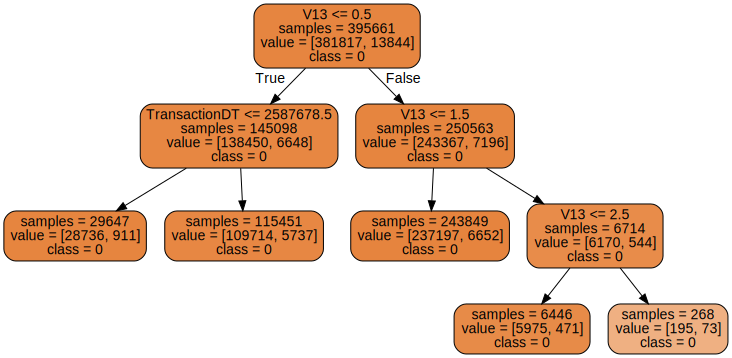

In [547]:
tree_graph = tree.export_graphviz(clf, out_file=None, max_depth = 10,
    impurity = False, feature_names = X.columns, class_names = ['0', '1'],
    rounded = True, filled= True )
graphviz.Source(tree_graph)


###finish exploring

In [15]:
train.columns

Index(['TransactionID', 'isFraud', 'TransactionDT', 'TransactionAmt',
       'ProductCD', 'card1', 'card2', 'card3', 'card4', 'card5',
       ...
       'DeviceType', 'DeviceInfo', 'TransactionDT1', 'month', 'day',
       'dayofweek', 'hour', 'weekofyear', 'TransactionAmt_decimal', 'nulls'],
      dtype='object', length=442)

In [16]:
test.columns

Index(['TransactionID', 'TransactionDT', 'TransactionAmt', 'ProductCD',
       'card1', 'card2', 'card3', 'card4', 'card5', 'card6',
       ...
       'DeviceType', 'DeviceInfo', 'TransactionDT1', 'month', 'day',
       'dayofweek', 'hour', 'weekofyear', 'TransactionAmt_decimal', 'nulls'],
      dtype='object', length=441)

In [363]:
#for explore interaction features plot part
data=pd.concat((X,y),axis=1)
data.groupby('V13_TransactionDT')['isFraud'].mean()

KeyError: 'V13_TransactionDT'

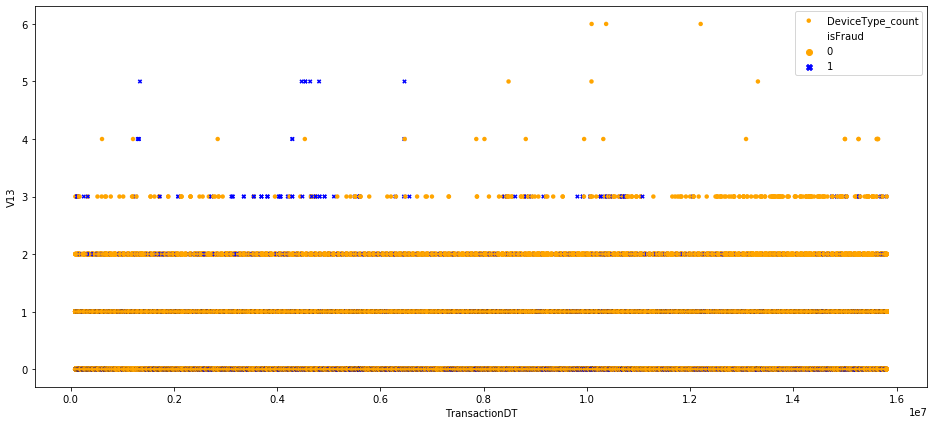

In [231]:
#TransactionDT vs V13
plt.figure(figsize=(16, 7))
#remember to drop isFraud and TransactionDT later when train model
X['isFraud']=train['isFraud']
X['TransactionDT']=train['TransactionDT']
sns.scatterplot(data=X, x="TransactionDT", y="V13",  s=20, alpha=1, edgecolor="none", label='V13', 
                hue='isFraud',style='isFraud',palette=['orange','blue']);

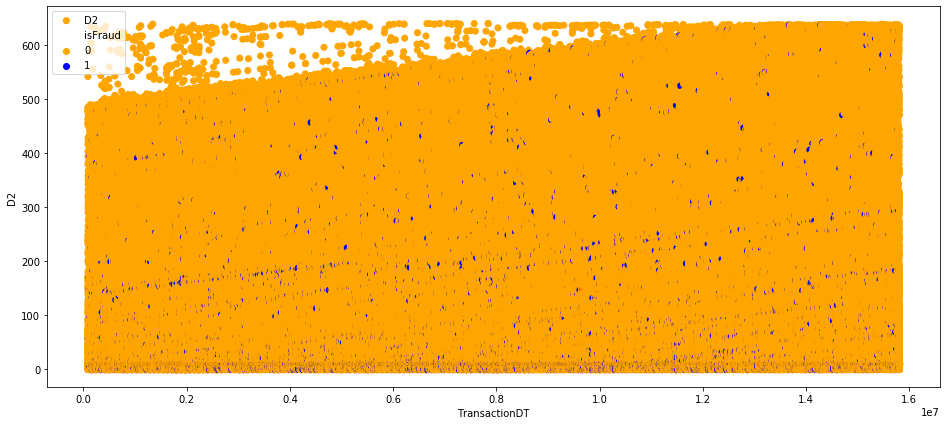

In [355]:
#TransactionDT vs D2
plt.figure(figsize=(16, 7))
#remember to drop isFraud and TransactionDT later when train model
X['isFraud']=train['isFraud']
X['TransactionDT']=train['TransactionDT']
sns.scatterplot(data=X, x="TransactionDT", y="D2",  s=50, alpha=1, edgecolor="none", label='D2', 
                hue='isFraud',palette=['orange','blue']);

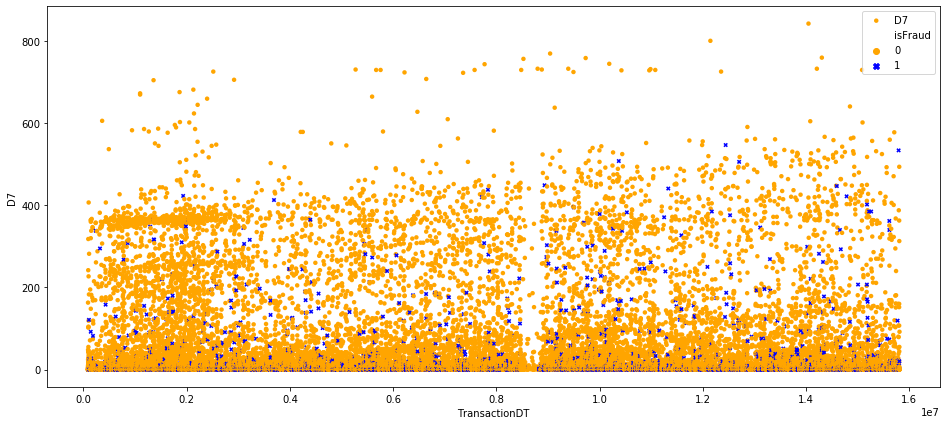

In [340]:
#TransactionDT vs D7
plt.figure(figsize=(16, 7))
#remember to drop isFraud and TransactionDT later when train model
X['isFraud']=train['isFraud']
X['TransactionDT']=train['TransactionDT']
sns.scatterplot(data=X, x="TransactionDT", y="D7",  s=20, alpha=1, edgecolor="none", label='D7', 
                hue='isFraud',palette=['orange','blue']);

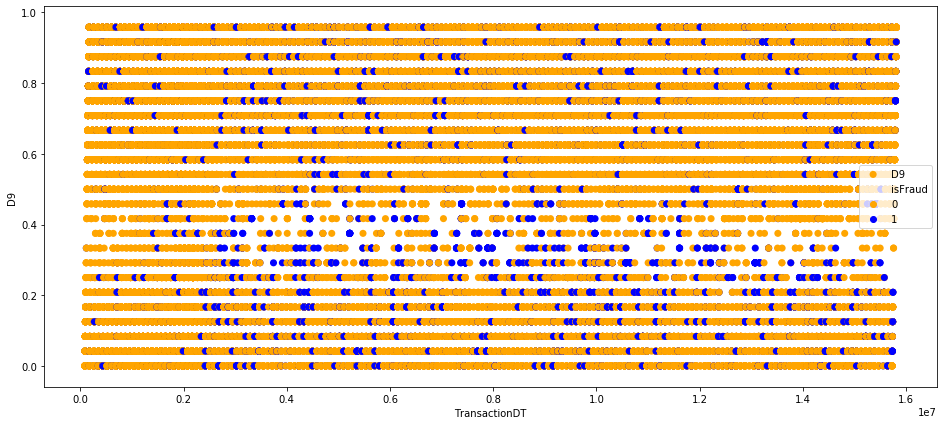

In [357]:
#TransactionDT vs D9
plt.figure(figsize=(16, 7))
#remember to drop isFraud and TransactionDT later when train model
X['isFraud']=train['isFraud']
X['TransactionDT']=train['TransactionDT']
sns.scatterplot(data=X, x="TransactionDT", y="D9",  s=50, alpha=1, edgecolor="none", label='D9', 
                hue='isFraud',palette=['orange','blue']);

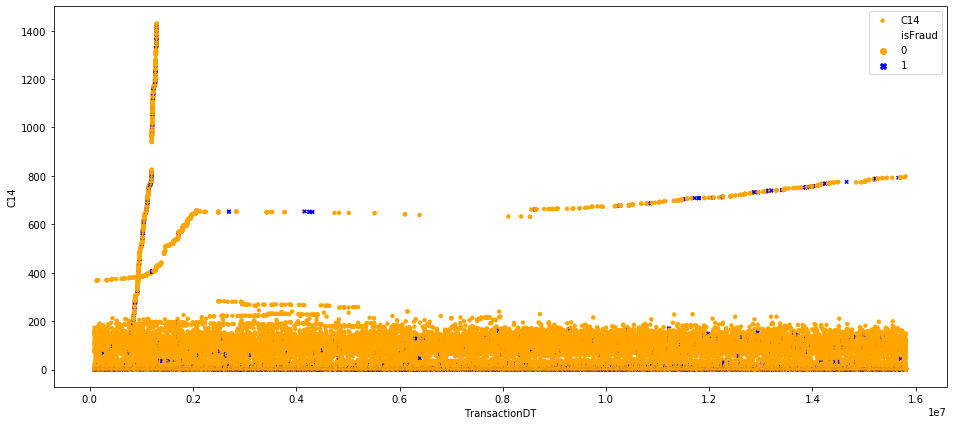

In [341]:
#TransactionDT vs C14
plt.figure(figsize=(16, 7))
#remember to drop isFraud and TransactionDT later when train model
X['isFraud']=train['isFraud']
X['TransactionDT']=train['TransactionDT']
sns.scatterplot(data=X, x="TransactionDT", y="C14",  s=20, alpha=1, edgecolor="none", label='C14', 
                hue='isFraud',palette=['orange','blue']);

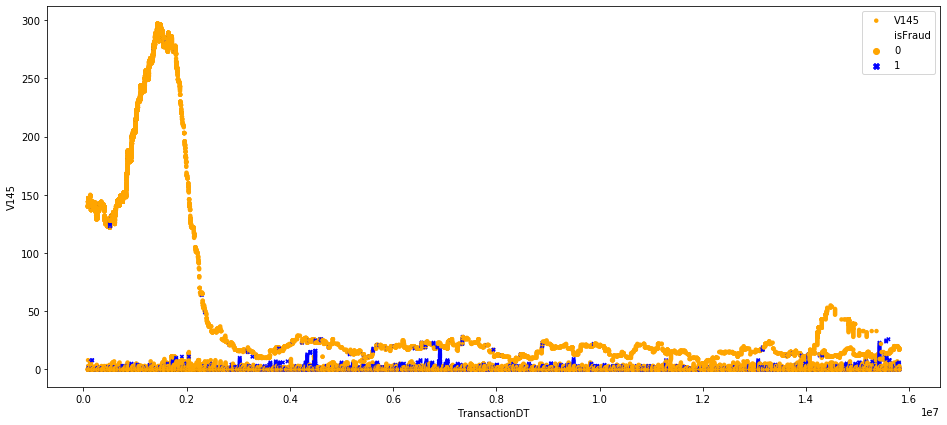

In [316]:
#TransactionDT vs V145
plt.figure(figsize=(16, 7))
#remember to drop isFraud and TransactionDT later when train model
X['isFraud']=train['isFraud']
X['TransactionDT']=train['TransactionDT']
sns.scatterplot(data=X, x="TransactionDT", y="V145",  s=20, alpha=1, edgecolor="none", label='V145', 
                hue='isFraud',palette=['orange','blue']);

In [366]:
X.columns

Index(['TransactionID', 'nulls', 'month', 'hour', 'TransactionAmt',
       'TransactionAmt_decimal', 'D5', 'D2', 'D8', 'D9', 'D11', 'D15', 'C1',
       'C4', 'C8', 'C10', 'C13', 'V256', 'V13', 'card1', 'card2', 'card3',
       'card5', 'addr1', 'V145', 'M4_count', 'M6_count', 'card1_count',
       'card6_count', 'DeviceType_count', 'ProductCD_count',
       'P_emaildomain_count', 'addr1_count', 'card4_dic', 'ProductCD_dic',
       'card6_dic', 'M1_dic', 'M4_dic', 'M5_dic', 'M6_dic',
       'P_emaildomain_dic', 'R_emaildomain_dic', 'C2_TransactionDT'],
      dtype='object')

In [24]:
data=pd.concat((X,y),axis=1)
data.groupby('C2_TransactionDT')['isFraud'].mean()

C2_TransactionDT
1    0.034415
2    0.384615
3    1.000000
4    0.108238
Name: isFraud, dtype: float64

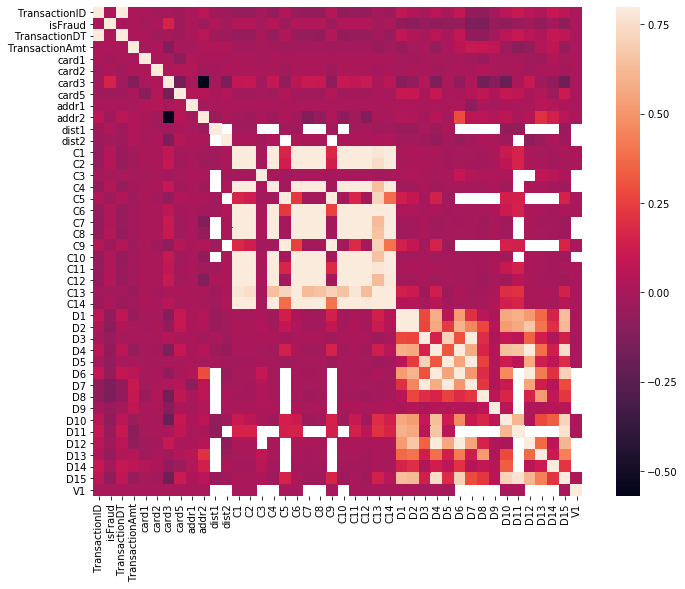

In [47]:
#corr heatmap for subset of all features
train_sub1=train[['TransactionID','isFraud','TransactionDT','TransactionAmt','ProductCD','card1','card2','card3',
                  'card4','card5','card6','addr1','addr2','dist1','dist2','P_emaildomain','R_emaildomain',
                  'C1','C2','C3','C4','C5','C6','C7','C8','C9','C10','C11','C12','C13','C14','D1','D2','D3','D4',
                  'D5','D6','D7','D8','D9','D10','D11','D12','D13','D14','D15','M1','M2','M3','M4','M5','M6','M7',
                  'M8','M9','V1','DeviceType','DeviceInfo']]
corrmat = train_sub1.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

In [56]:
corrmat[:10]

,TransactionID,isFraud,TransactionDT,TransactionAmt,card1,card2,card3,card5,addr1,addr2,...,D7,D8,D9,D10,D11,D12,D13,D14,D15,V1
TransactionID,1.000000,0.014166,0.998280,0.012025,0.010122,-0.019900,-0.010091,-0.023900,-0.000370,0.057213,...,-0.071569,-0.071505,-0.015457,0.056533,0.100242,0.052536,0.023352,0.095742,0.071285,0.001609
isFraud,0.014166,1.000000,0.013103,0.011320,-0.013640,0.003388,0.154151,-0.033580,0.005596,-0.030387,...,-0.127199,-0.142636,-0.044253,-0.072002,-0.045094,-0.028864,-0.059430,-0.008663,-0.077519,0.001045
TransactionDT,0.998280,0.013103,1.000000,0.011920,0.010625,-0.019202,-0.011222,-0.024132,-0.000051,0.051972,...,-0.070221,-0.068752,-0.013735,0.058409,0.101266,0.053108,0.024405,0.097509,0.072791,0.001360
TransactionAmt,0.012025,0.011320,0.011920,1.000000,-0.005725,0.016136,-0.109785,0.003061,-0.007421,0.028312,...,0.099719,0.096806,0.073852,-0.038982,-0.088448,-0.065834,0.041298,0.072110,-0.054735,0.000977
card1,0.010122,-0.013640,0.010625,-0.005725,1.000000,0.004960,0.002965,-0.093633,0.020369,-0.000060,...,-0.022303,-0.040851,-0.000275,-0.000844,-0.005144,-0.020610,-0.028603,0.034955,-0.004846,0.000316
card2,-0.019900,0.003388,-0.019202,0.016136,0.004960,1.000000,0.023816,0.030486,0.030356,-0.022383,...,0.002938,0.028781,0.003446,-0.006310,0.006366,-0.013525,0.003412,0.016965,-0.014503,-0.000829
card3,-0.010091,0.154151,-0.011222,-0.109785,0.002965,0.023816,1.000000,-0.158383,0.001090,-0.569108,...,0.020721,-0.171774,-0.102086,-0.202669,0.001533,0.103120,-0.026586,-0.067191,-0.186742,-0.000065
card5,-0.023900,-0.033580,-0.024132,0.003061,-0.093633,0.030486,-0.158383,1.000000,0.035017,0.035726,...,0.040080,0.075558,0.015995,0.095575,0.073589,0.007872,0.030536,-0.034712,0.110301,-0.001866
addr1,-0.000370,0.005596,-0.000051,-0.007421,0.020369,0.030356,0.001090,0.035017,1.000000,-0.002765,...,-0.079024,0.001813,-0.002913,0.013914,0.010273,0.008196,0.050886,0.032099,0.014228,-0.001638
addr2,0.057213,-0.030387,0.051972,0.028312,-0.000060,-0.022383,-0.569108,0.035726,-0.002765,1.000000,...,0.060673,0.057475,0.032151,0.059692,0.005789,0.042501,0.208817,0.142099,0.056424,-0.000061


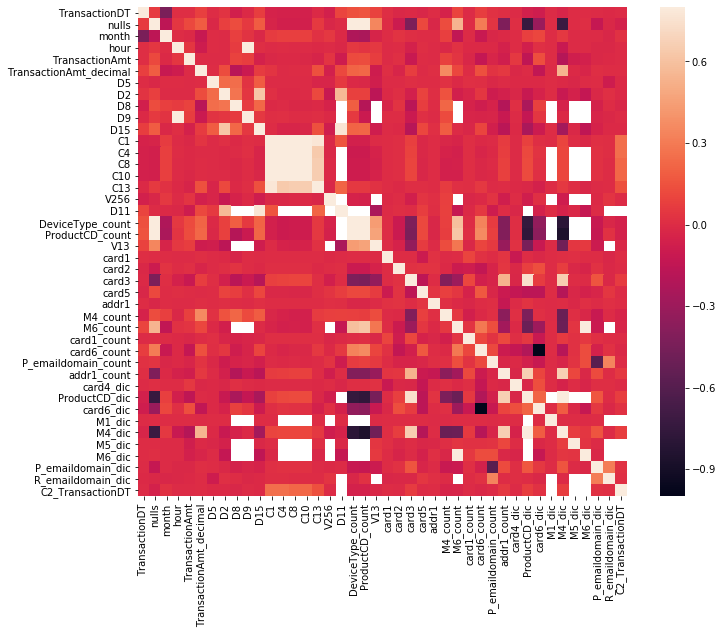

In [46]:
train_sub1=X_for_heatmap[['TransactionDT', 'nulls', 'month', 'hour', 'TransactionAmt',
       'TransactionAmt_decimal', 'D5', 'D2', 'D8', 'D9',  'D15', 'C1',
       'C4', 'C8', 'C10', 'C13','V256', 'D11','DeviceType_count', 'ProductCD_count','V13', 'card1', 'card2', 'card3',
       'card5', 'card6','addr1','P_emaildomain','R_emaildomain', 'M4_count', 'M6_count',
       'card1_count', 'card6_count', 'ProductCD','P_emaildomain_count',
       'addr1_count', 'card4_dic', 'ProductCD_dic', 'card6_dic', 'M1_dic',
       'M4_dic', 'M5_dic', 'M6_dic', 'P_emaildomain_dic', 'R_emaildomain_dic',
       'C2_TransactionDT','M4','M6','DeviceType','DeviceInfo']]
corrmat = train_sub1.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

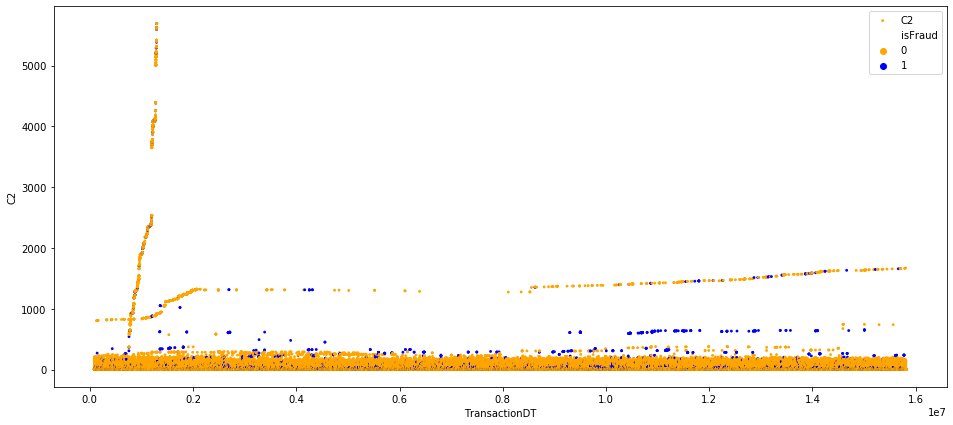

In [39]:
#findings in C2 and TransactionDT interaction:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import suptitle

sns.__version__
plt.figure(figsize=(16, 7))
sns.scatterplot(data=train, x="TransactionDT", y="C2",  s=8, alpha=1, edgecolor="none", label='C2',palette=['orange','blue'], hue='isFraud');

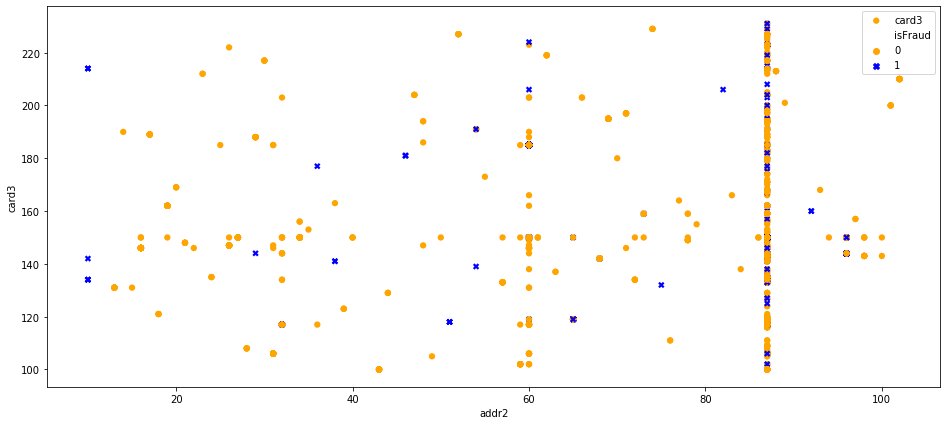

In [226]:
#card3 vs addr2
plt.figure(figsize=(16, 7))
#remember to drop isFraud later when train model
X['isFraud']=train['isFraud']
sns.scatterplot(data=X, x="addr2", y="card3", s=40, alpha=1, edgecolor="none", label='card3',palette=['orange','blue'],
                hue='isFraud',style='isFraud');

In [172]:
train['addr2'].value_counts().nlargest(50)

87.0     520481
60.0       3084
96.0        638
32.0         91
65.0         82
16.0         55
31.0         47
19.0         33
26.0         25
27.0         20
59.0         17
69.0         17
34.0         16
43.0         12
98.0         11
29.0         11
102.0        11
68.0         10
57.0         10
78.0          8
10.0          8
17.0          7
71.0          7
13.0          7
54.0          6
72.0          6
88.0          5
52.0          5
73.0          5
21.0          5
28.0          4
30.0          4
62.0          4
101.0         4
48.0          4
47.0          4
51.0          4
61.0          3
18.0          3
46.0          3
40.0          3
44.0          3
39.0          3
38.0          3
24.0          3
20.0          3
74.0          3
92.0          2
36.0          2
23.0          2
Name: addr2, dtype: int64

In [120]:
data=X.iloc[:]
data['isFraud']=y.iloc[:]
data.groupby('id_06_count')['isFraud'].mean()

id_06_count
5         0.000000
6         0.000000
7         0.000000
8         0.000000
10        0.263158
11        0.000000
12        0.100000
13        0.000000
14        0.000000
15        0.000000
18        0.000000
20        0.000000
21        0.029412
23        0.021739
24        0.000000
27        0.041667
31        0.000000
33        0.000000
34        0.000000
41        0.000000
42        0.000000
43        0.000000
45        0.090909
48        0.000000
51        0.015385
55        0.040000
67        0.000000
72        0.000000
77        0.024390
78        0.000000
            ...   
1089      0.128906
1098      0.144654
1216      0.022887
1297      0.101911
1335      0.109063
1341      0.096012
1355      0.097451
1413      0.112094
1436      0.160689
1446      0.114074
1462      0.126214
1597      0.116580
1643      0.113001
1672      0.127811
1733      0.136531
1802      0.104167
2292      0.155272
2547      0.081441
3102      0.074329
3509      0.124908
3969      0.105316


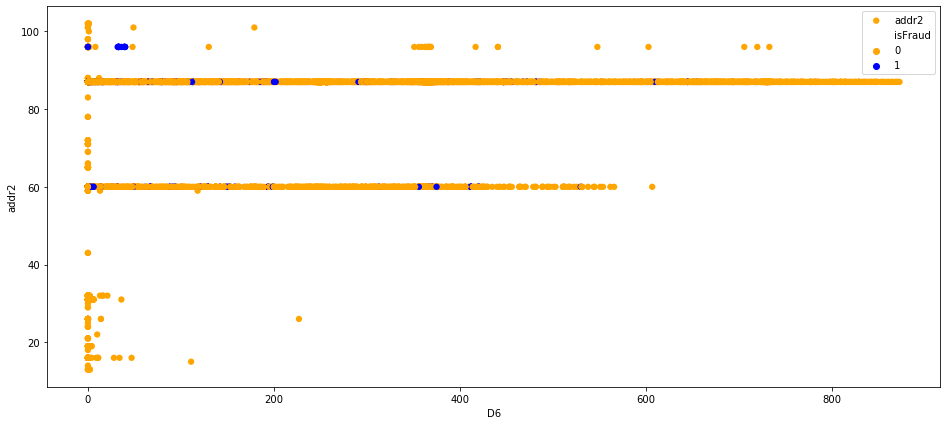

In [228]:
#D6 vs addr2
plt.figure(figsize=(16, 7))
#remember to drop isFraud later when train model
X['isFraud']=train['isFraud']
sns.scatterplot(data=X, x="D6", y="addr2",  s=40, alpha=1, edgecolor="none", label='addr2', hue='isFraud',palette=['orange','blue']);

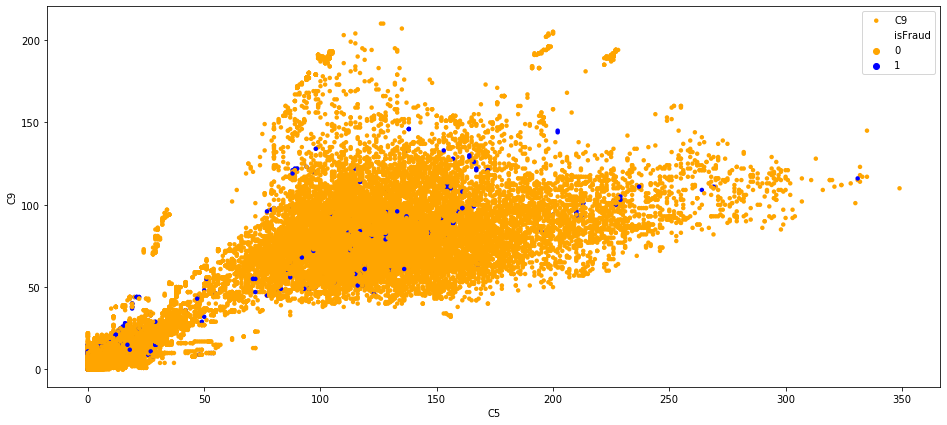

In [229]:
#C5 vs C9
plt.figure(figsize=(16, 7))
#remember to drop isFraud later when train model
X['isFraud']=train['isFraud']
sns.scatterplot(data=X, x="C5", y="C9",  s=20, alpha=1, edgecolor="none", label='C9', hue='isFraud',palette=['orange','blue']);

In [188]:
train.groupby('V13')['isFraud'].mean()

V13
0.0    0.045780
1.0    0.020890
2.0    0.075872
3.0    0.261456
4.0    0.269231
5.0    0.700000
6.0    0.000000
Name: isFraud, dtype: float64

In [189]:
train.groupby('V13')['isFraud'].count()

V13
0.0    216752
1.0    287644
2.0      9661
3.0       371
4.0        26
5.0        10
6.0         3
Name: isFraud, dtype: int64

In [ ]:
X.groupby('C2_TransactionDT')['isFraud'].mean()

In [66]:
train.groupby('ProductCD').count()

,TransactionID,isFraud,TransactionDT,TransactionAmt,card1,card2,card3,card4,card5,card6,...,id_38,DeviceType,DeviceInfo,TransactionDT1,month,day,dayofweek,hour,TransactionAmt_decimal,nulls
ProductCD,,,,,,,,,,,,,,,,,,,,,
C,68519,68519,68519,68519,68519,67988,68326,68324,67896,68326,...,61016,61015,41593,68519,68519,68519,68519,68519,68519,68519
H,33024,33024,33024,33024,33024,32879,33023,33014,32864,33023,...,32146,32098,31527,33024,33024,33024,33024,33024,33024,33024
R,37699,37699,37699,37699,37699,37523,37699,37698,37307,37694,...,36537,36429,36069,37699,37699,37699,37699,37699,37699,37699
S,11628,11628,11628,11628,11628,11552,11628,11628,11597,11627,...,11286,11268,9477,11628,11628,11628,11628,11628,11628,11628
W,439670,439670,439670,439670,439670,431665,438299,438299,436617,438299,...,0,0,0,439670,439670,439670,439670,439670,439670,439670


In [14]:
X['D5'].isna().sum()/X.shape[0]   #0.524674027161581
X['D2'].isna().sum()/X.shape[0]   #0.4754919226470688
X['D11'].isna().sum()/X.shape[0]  #0.47293494090154775
X['D15'].isna().sum()/X.shape[0]  #0.1509008703898127
#X['V1'].isna().sum()/X.shape[0]   #0.47293494090154775
#X['V2'].isna().sum()/X.shape[0]   #0.47293494090154775
#X['V13'].isna().sum()/X.shape[0]  #0.1288193856470349
#X['V263'].isna().sum()/X.shape[0] #0.7791343516103905
X['card2'].isna().sum()/X.shape[0] #0.015126833068039422
X['card3'].isna().sum()/X.shape[0] #0.0026501168422122124
X['card4_dic'].isna().sum()/X.shape[0] #0.00267043722694483
X['M4_dic'].isna().sum()/X.shape[0] #0.47658753005723575
X['M6_dic'].isna().sum()/X.shape[0] #0.28678836319300977
X['cross'].isna().sum()/X.shape[0]   #0.00267043722694483
X['R_emaildomain_dic'].isna().sum()/X.shape[0] #0.8257611677447759

KeyError: 'V1'

In [ ]:
data=pd.concat([X,y], axis=1)
data[data['cross'].isna()==True]['isFraud'].mean()

In [16]:
train[train['D15'].isna()==True]['isFraud'].mean()

0.04798402028884675

[269819, 300058, 10880, 9783]

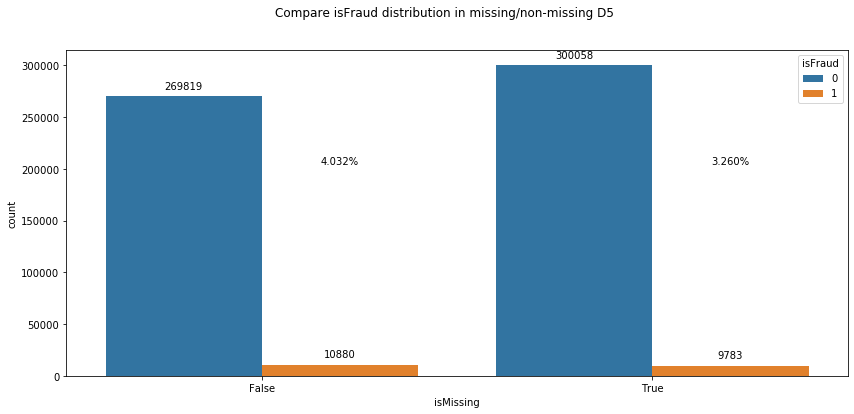

In [130]:
#Strategy: plot to decide how to fill missing data:
#for example if missing value in a column correspond to higher fraud rate, then use the level with higher risk to fill missing, 
#or simply use 'other'.
import matplotlib.pyplot as plt
def plt_compare_missing(var):
    plt.figure(figsize=(14, 6))
#    plt.subplot(1,2,1)
    data= pd.DataFrame()
    data['isMissing']=train[var].isna()
    data['isFraud']=train['isFraud']
    suptitle("Compare isFraud distribution in missing/non-missing "+var)
    splot=sns.countplot(x='isMissing',hue='isFraud', data=data)
    res=[]
    for p in splot.patches:
        splot.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2.,
            p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
        res.append(p.get_height())
    splot.annotate(format(res[2]*100/res[0], '.3f')+'%', (p.get_x() - p.get_width()*2 ,
        p.get_height()*10+100000), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
    splot.annotate(format(res[3]*100/res[1], '.3f')+'%', (p.get_x() + p.get_width()/2 ,
        p.get_height()*10+100000), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
    return res
    
    
#     plt.subplot(1,2,2)
#     data = pd.concat([train['isFraud'],train[var]], axis=1)
#     suptitle("Compare isFraud distribution in levels of "+var)
#     splot=sns.countplot(x=var,hue='isFraud', data=data)
    
plt_compare_missing('D5')

In [206]:
a = train.groupby('id_02')['isFraud'].mean()
#a.nlargest(70)

[67099, 502778, 7827, 12836]

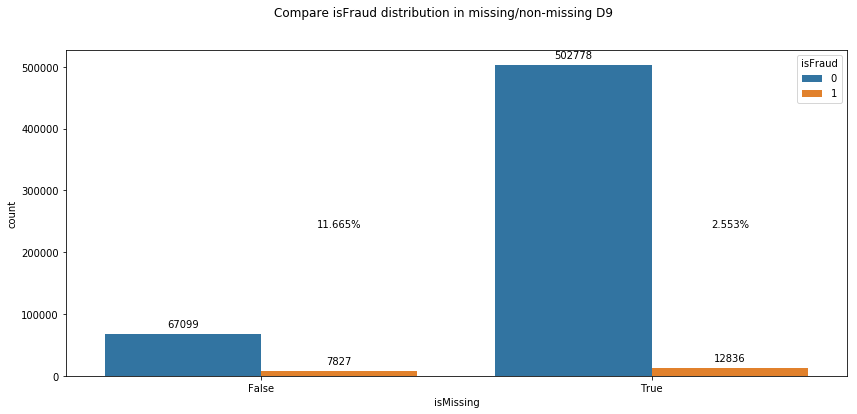

In [129]:
plt_compare_missing('D9')

In [137]:
a = train.groupby('D9')['isFraud'].mean()
a.nlargest(50)

D9
0.291666    0.310709
0.375000    0.306502
0.333333    0.271318
0.250000    0.233365
0.416666    0.183168
0.208333    0.171458
0.458333    0.156889
0.166666    0.151113
0.083333    0.123725
0.958333    0.120834
0.125000    0.112757
0.000000    0.108353
0.041666    0.107946
0.875000    0.106444
0.916666    0.106306
0.791666    0.095768
0.833333    0.095202
0.750000    0.091898
0.500000    0.086072
0.708333    0.080670
0.666666    0.074965
0.625000    0.059817
0.583333    0.058178
0.541666    0.047701
Name: isFraud, dtype: float64

[305147, 264730, 6106, 14557]

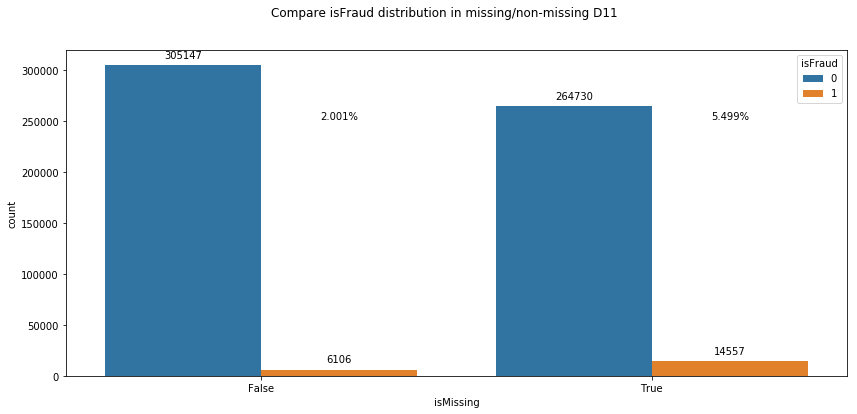

In [21]:
plt_compare_missing('D11')

In [115]:
a = train.groupby('D11')['isFraud'].mean()
a.nlargest(20)

D11
1.0      0.087836
2.0      0.083168
3.0      0.077954
4.0      0.077295
104.0    0.069971
6.0      0.062500
655.0    0.058824
11.0     0.055391
10.0     0.054359
347.0    0.052863
5.0      0.052669
176.0    0.047431
25.0     0.047354
52.0     0.047297
9.0      0.046070
111.0    0.043077
7.0      0.042709
525.0    0.041475
12.0     0.039877
19.0     0.039735
Name: isFraud, dtype: float64

[485040, 84837, 16387, 4276]

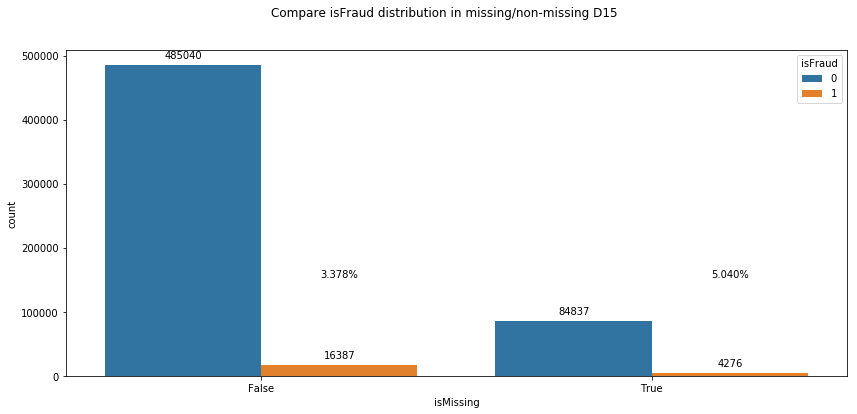

In [22]:
plt_compare_missing('D15')

In [128]:
a = train.groupby('D15')['isFraud'].mean()
a.nlargest(100)

D15
835.0    0.666667
687.0    0.200000
699.0    0.200000
667.0    0.166667
1.0      0.120620
2.0      0.119209
269.0    0.101983
3.0      0.092078
356.0    0.090426
5.0      0.076199
25.0     0.076077
4.0      0.071512
9.0      0.063977
666.0    0.062500
8.0      0.060314
6.0      0.060193
10.0     0.059443
137.0    0.054502
47.0     0.054334
150.0    0.054326
198.0    0.053846
7.0      0.051998
23.0     0.051915
11.0     0.051780
22.0     0.051302
376.0    0.049180
18.0     0.048348
104.0    0.047863
97.0     0.047128
291.0    0.047022
           ...   
232.0    0.036408
35.0     0.036050
145.0    0.035714
129.0    0.035556
359.0    0.035503
71.0     0.035387
229.0    0.035230
268.0    0.035230
102.0    0.035055
161.0    0.035052
186.0    0.034404
537.0    0.034392
357.0    0.033766
300.0    0.033742
96.0     0.033654
103.0    0.033333
191.0    0.033248
195.0    0.032864
170.0    0.032787
33.0     0.032680
193.0    0.032338
63.0     0.031985
48.0     0.031690
333.0    0.031579
200.0 

[568341, 1536, 20622, 41]

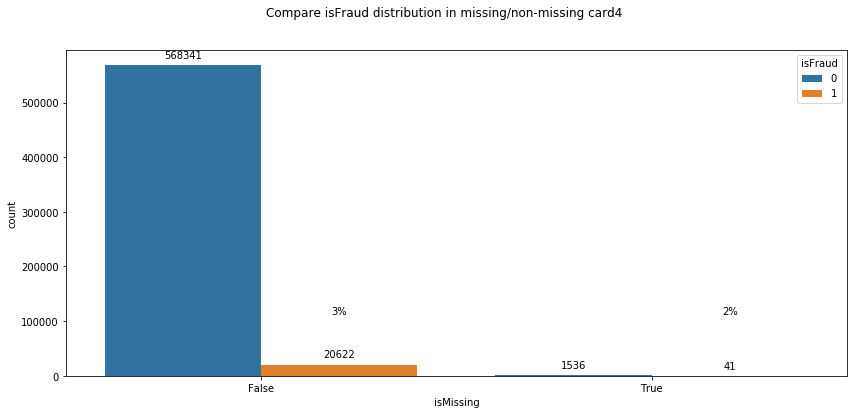

In [206]:
plt_compare_missing('card4')
#X['card4_dic'].isna()

In [169]:
a = train.groupby('card4')['isFraud'].mean()
a

card4
discover            0.077282
visa                0.034756
mastercard          0.034331
american express    0.028698
Name: isFraud, dtype: float64

[511912, 57965, 12922, 7741]

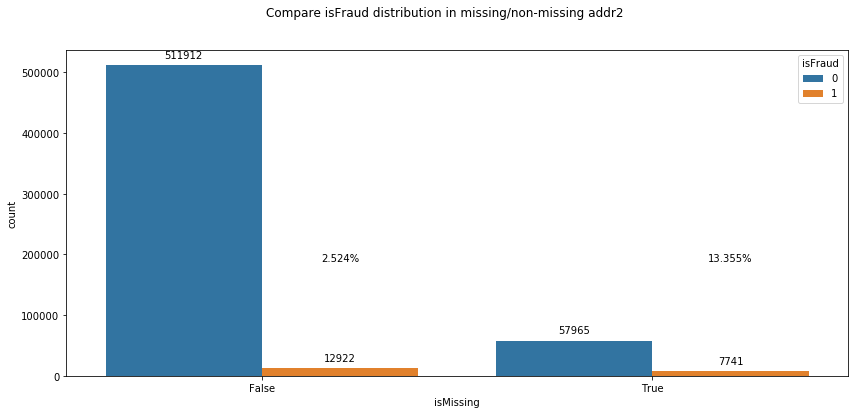

In [77]:
plt_compare_missing('addr2')

In [79]:
a = train.groupby('addr2')['isFraud'].mean()
a.nlargest(100)

addr2
10.0     1.000000
82.0     1.000000
51.0     1.000000
46.0     1.000000
92.0     1.000000
75.0     1.000000
38.0     0.666667
65.0     0.536585
36.0     0.500000
54.0     0.333333
73.0     0.200000
96.0     0.139498
68.0     0.100000
29.0     0.090909
60.0     0.090467
32.0     0.065934
87.0     0.023972
94.0     0.000000
62.0     0.000000
63.0     0.000000
101.0    0.000000
100.0    0.000000
66.0     0.000000
98.0     0.000000
97.0     0.000000
69.0     0.000000
70.0     0.000000
71.0     0.000000
83.0     0.000000
84.0     0.000000
           ...   
14.0     0.000000
15.0     0.000000
16.0     0.000000
17.0     0.000000
18.0     0.000000
19.0     0.000000
20.0     0.000000
21.0     0.000000
22.0     0.000000
23.0     0.000000
24.0     0.000000
25.0     0.000000
26.0     0.000000
27.0     0.000000
28.0     0.000000
30.0     0.000000
31.0     0.000000
34.0     0.000000
35.0     0.000000
39.0     0.000000
40.0     0.000000
43.0     0.000000
44.0     0.000000
47.0     0.000000
48.0

In [482]:
a = train.groupby('addr2')['isFraud'].mean()
a = train.groupby('addr2')['isFraud'].count()
#a.sort_values(ascending=False).iloc[0:50]

In [640]:
a = train.groupby('ProductCD')['isFraud'].mean()
a

ProductCD
C    0.116873
H    0.047662
R    0.037826
S    0.058996
W    0.020399
Name: isFraud, dtype: float64

In [646]:
a = train.groupby('card6')['isFraud'].mean()
a

card6
charge card        0.000000
credit             0.066785
debit              0.024263
debit or credit    0.000000
Name: isFraud, dtype: float64

[561367, 8510, 20240, 423]

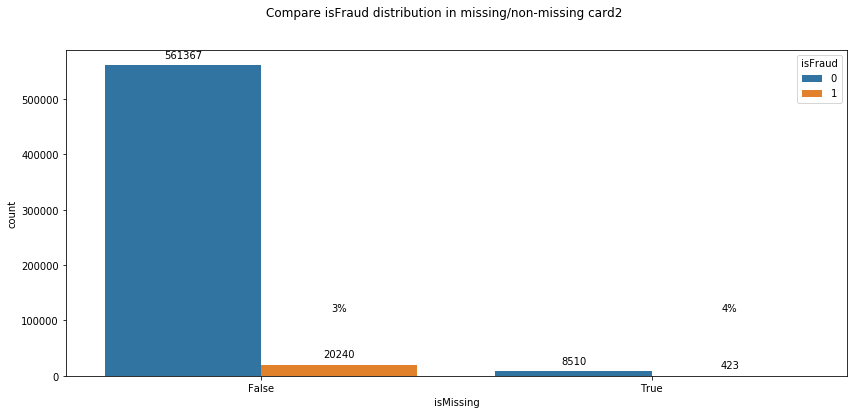

In [207]:
plt_compare_missing('card2')

In [175]:
a = train.groupby('card2')['isFraud'].mean()
a.nlargest(100)

card2
289.0    0.406780
405.0    0.403509
319.0    0.390000
176.0    0.360624
482.0    0.327381
407.0    0.303571
311.0    0.280277
104.0    0.248011
324.0    0.241692
177.0    0.241169
142.0    0.240356
130.0    0.239257
141.0    0.236559
585.0    0.210127
357.0    0.208333
459.0    0.199409
211.0    0.198020
156.0    0.196078
341.0    0.192982
296.0    0.191971
266.0    0.191514
500.0    0.180575
529.0    0.180371
238.0    0.178344
463.0    0.178082
279.0    0.176991
440.0    0.164134
273.0    0.153846
246.0    0.152672
403.0    0.144444
           ...   
547.0    0.053498
443.0    0.053097
488.0    0.052632
228.0    0.052023
565.0    0.051447
154.0    0.050633
553.0    0.050500
385.0    0.049401
502.0    0.049296
158.0    0.047868
185.0    0.047059
380.0    0.047059
549.0    0.046729
514.0    0.046214
239.0    0.044586
579.0    0.043887
118.0    0.043243
221.0    0.043165
417.0    0.042308
583.0    0.041233
474.0    0.041063
134.0    0.040816
572.0    0.039604
367.0    0.039474
478.

[568351, 1526, 20624, 39]

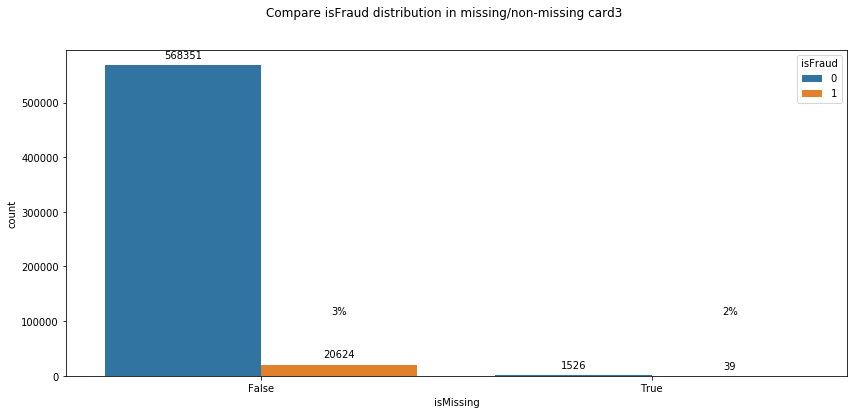

In [208]:
plt_compare_missing('card3')

In [178]:
a = train.groupby('card3')['isFraud'].mean()
a.nlargest(50)

card3
125.0    1.000000
132.0    1.000000
139.0    1.000000
160.0    1.000000
175.0    1.000000
181.0    1.000000
206.0    1.000000
224.0    1.000000
208.0    0.500000
191.0    0.388889
155.0    0.333333
223.0    0.254545
167.0    0.250000
118.0    0.235294
129.0    0.222222
157.0    0.200000
198.0    0.193548
182.0    0.179487
231.0    0.166667
127.0    0.142857
185.0    0.130657
142.0    0.125000
183.0    0.111111
219.0    0.111111
119.0    0.093333
168.0    0.090909
214.0    0.090909
144.0    0.089457
133.0    0.080000
180.0    0.076923
134.0    0.066265
141.0    0.061224
177.0    0.060606
121.0    0.050505
135.0    0.050000
100.0    0.049505
126.0    0.043478
137.0    0.042254
188.0    0.034286
143.0    0.031146
210.0    0.028846
138.0    0.028571
111.0    0.025641
150.0    0.024568
159.0    0.024390
102.0    0.023913
203.0    0.023715
215.0    0.022727
166.0    0.021277
146.0    0.019968
Name: isFraud, dtype: float64

[293660, 276217, 15436, 5227]

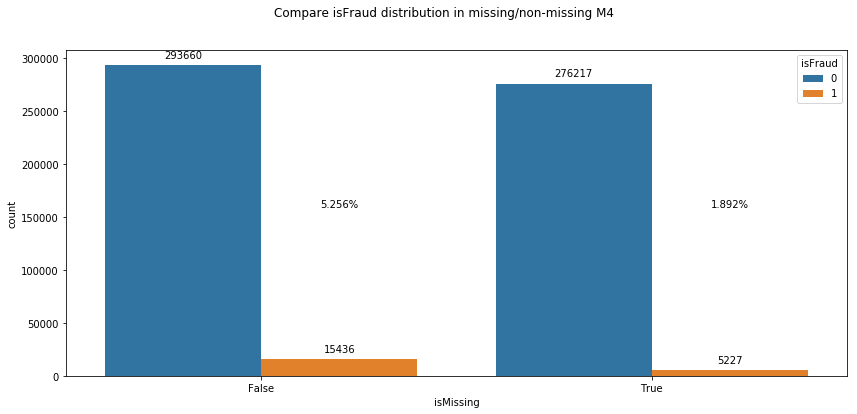

In [23]:
plt_compare_missing('M4')

In [189]:
a = train.groupby('M4')['isFraud'].mean()
a.nlargest(50)

M4
M2    0.113739
M0    0.036649
M1    0.027051
Name: isFraud, dtype: float64

[412488, 157389, 8692, 11971]

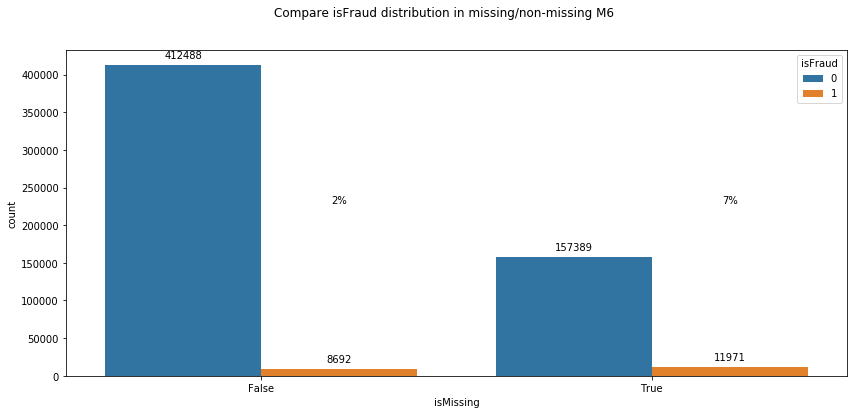

In [210]:
plt_compare_missing('M6')

In [190]:
a = train.groupby('M6')['isFraud'].mean()
a

M6
F    0.023686
T    0.017044
Name: isFraud, dtype: float64

[239471, 330406, 4817, 15846]

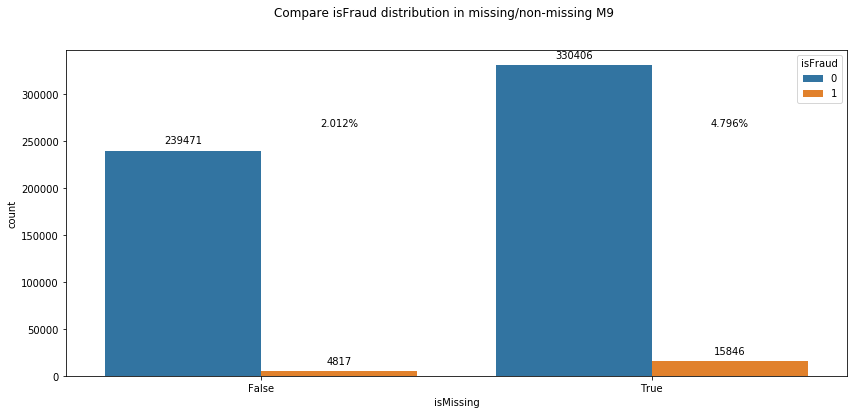

In [174]:
plt_compare_missing('M9')

In [175]:
a = train.groupby('M9')['isFraud'].mean()
a

M9
F    0.030001
T    0.017787
Name: isFraud, dtype: float64

[407004, 162873, 14567, 6096]

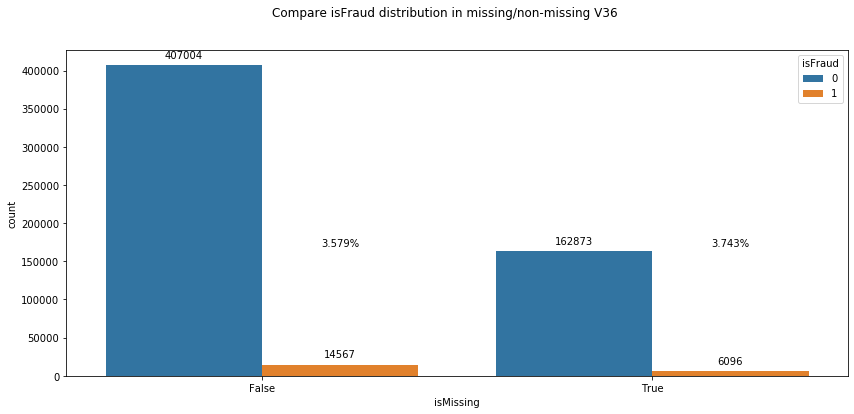

In [204]:
plt_compare_missing('V36')

In [207]:
a = train.groupby('V36')['isFraud'].mean()
#a = train.groupby('V36')['isFraud'].count()
a

V36
0.0    0.051116
1.0    0.020179
2.0    0.049236
3.0    0.101010
4.0    0.200000
5.0    0.000000
Name: isFraud, dtype: float64

[497691, 72186, 16776, 3887]

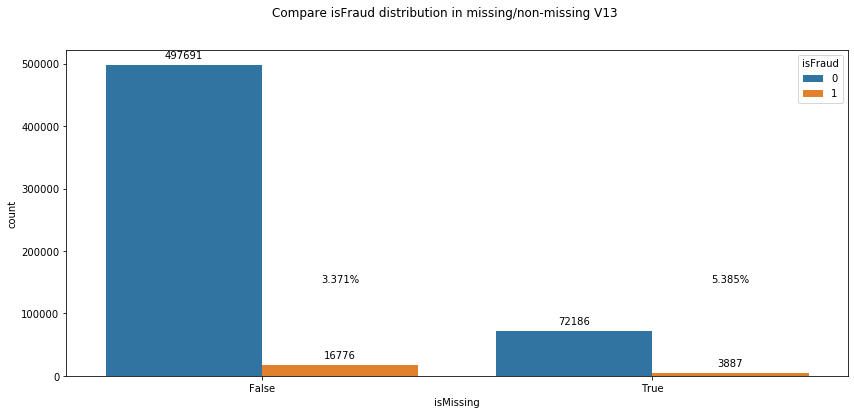

In [253]:
plt_compare_missing('V13')

In [107]:
a = train.groupby('V2')['isFraud'].mean()
#a.nlargest(50)
#a = train.groupby('V2')['isFraud'].count()
a

V2
0.0    0.000000
1.0    0.019127
2.0    0.030203
3.0    0.037257
4.0    0.030675
5.0    0.027778
6.0    0.300000
7.0    0.000000
8.0    0.000000
Name: isFraud, dtype: float64

[132915, 436962, 11318, 9345]

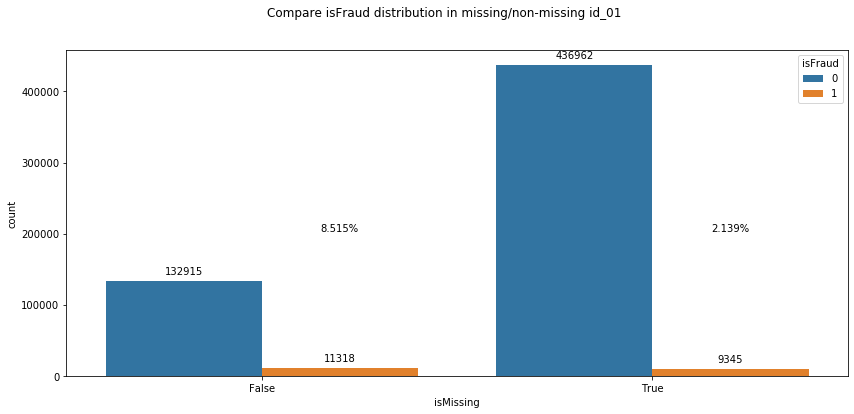

In [55]:
plt_compare_missing('id_01')

In [57]:
a = train.groupby('id_01')['isFraud'].count()
a.nlargest(50)

id_01
-5.0      82170
 0.0      19555
-10.0     11257
-20.0     11211
-15.0      5674
-25.0      4623
-45.0      2143
-35.0      1622
-40.0      1385
-100.0     1012
-50.0       709
-30.0       682
-95.0       428
-60.0       410
-55.0       320
-80.0       220
-90.0       214
-70.0        97
-65.0        93
-85.0        87
-75.0        83
-18.0        23
-12.0        15
-11.0        15
-6.0         15
-16.0        13
-21.0        12
-14.0        10
-7.0         10
-31.0         9
-19.0         9
-17.0         9
-26.0         8
-27.0         6
-87.0         5
-37.0         5
-23.0         5
-22.0         5
-62.0         4
-13.0         4
-9.0          4
-96.0         3
-44.0         3
-38.0         3
-99.0         2
-88.0         2
-71.0         2
-64.0         2
-61.0         2
-56.0         2
Name: isFraud, dtype: int64

In [49]:
a = train.groupby('id_01')['isFraud'].mean()
a.nlargest(50)
#a.sort_values(ascending=False)

id_01
-72.0     1.000000
-32.0     1.000000
-18.0     0.695652
-31.0     0.555556
-19.0     0.555556
-88.0     0.500000
-11.0     0.333333
-50.0     0.317348
-100.0    0.263834
-9.0      0.250000
-35.0     0.227497
-30.0     0.218475
-95.0     0.214953
-37.0     0.200000
-23.0     0.200000
-70.0     0.195876
-90.0     0.177570
-16.0     0.153846
-55.0     0.150000
-65.0     0.139785
-60.0     0.136585
-12.0     0.133333
-20.0     0.125413
-10.0     0.119392
-85.0     0.114943
-15.0     0.114381
-45.0     0.112926
-17.0     0.111111
-40.0     0.105415
-25.0     0.096474
-75.0     0.096386
-21.0     0.083333
-6.0      0.066667
-5.0      0.057965
-80.0     0.050000
 0.0      0.049757
-99.0     0.000000
-96.0     0.000000
-94.0     0.000000
-93.0     0.000000
-92.0     0.000000
-89.0     0.000000
-87.0     0.000000
-86.0     0.000000
-82.0     0.000000
-76.0     0.000000
-71.0     0.000000
-64.0     0.000000
-63.0     0.000000
-62.0     0.000000
Name: isFraud, dtype: float64

[497691, 72186, 16776, 3887]

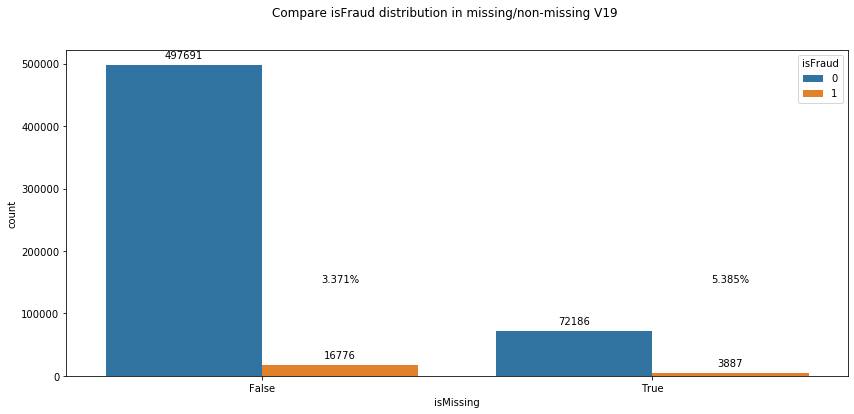

In [168]:
plt_compare_missing('V19')

In [169]:
a = train.groupby('V19')['isFraud'].mean()
#a.sort_values(ascending=False).iloc[0:30]

[59212, 510665, 7112, 13551]

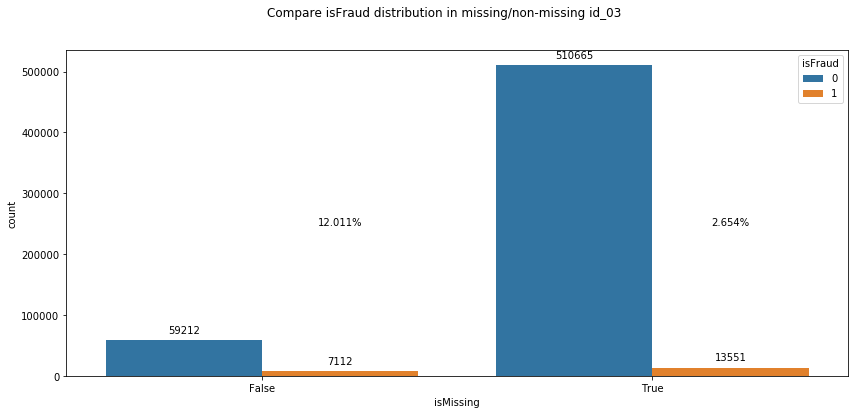

In [75]:
plt_compare_missing('id_03')

In [86]:
a = train.groupby('id_03')['isFraud'].count()
a

id_03
-13.0        3
-12.0        3
-11.0        6
-10.0       17
-9.0         6
-8.0        14
-7.0        21
-6.0        31
-5.0        33
-4.0        21
-3.0         8
-2.0        12
-1.0        12
 0.0     63903
 1.0       863
 2.0       421
 3.0       668
 4.0       100
 5.0       109
 6.0        64
 7.0         4
 8.0         1
 9.0         3
 10.0        1
Name: isFraud, dtype: int64

In [81]:
a = train.groupby('id_03')['isFraud'].mean()

id_03
-13.0    0.666667
-12.0    0.666667
-11.0    0.166667
-10.0    0.941176
-9.0     0.500000
-8.0     0.642857
-7.0     0.714286
-6.0     0.354839
-5.0     0.030303
-4.0     0.285714
-3.0     0.250000
-2.0     0.250000
-1.0     0.083333
 0.0     0.101529
 1.0     0.191194
 2.0     0.287411
 3.0     0.188623
 4.0     0.500000
 5.0     0.513761
 6.0     0.515625
 7.0     0.250000
 8.0     0.000000
 9.0     0.000000
 10.0    0.000000
Name: isFraud, dtype: float64

[129760, 440117, 11218, 9445]

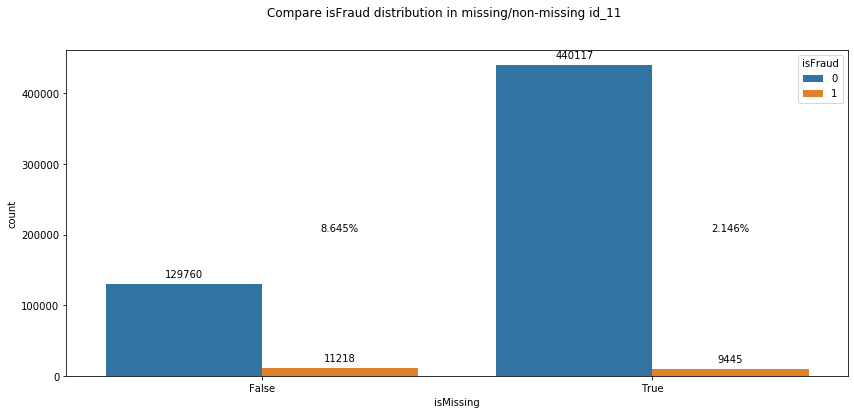

In [109]:
plt_compare_missing('id_11')

[128230, 441647, 11031, 9632]

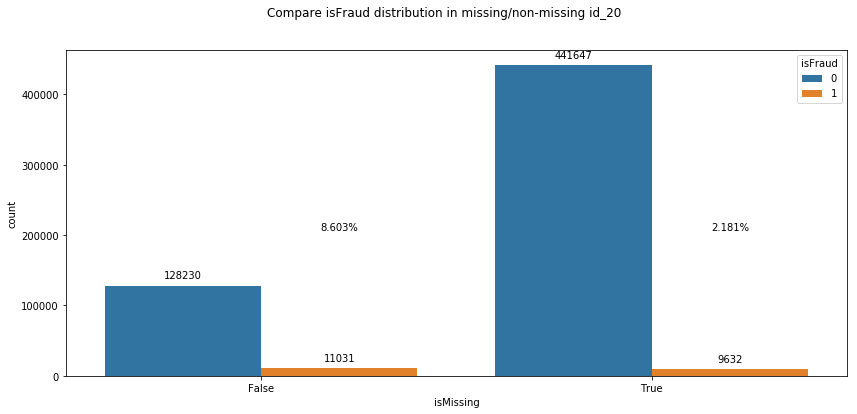

In [153]:
plt_compare_missing('id_20')

In [373]:
a = train.groupby('id_20')['isFraud'].mean()
#a.sort_values(ascending=False).iloc[80:140]

[128323, 441554, 11046, 9617]

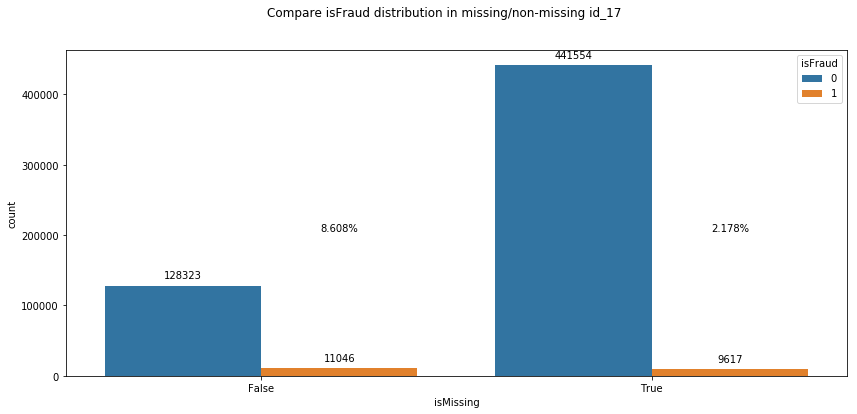

In [152]:
plt_compare_missing('id_17')

In [215]:
a = train.groupby('id_17')['isFraud'].mean()
#a.sort_values(ascending=False).iloc[20:100]

In [20]:
#check M4_dic
X['isFraud']=y
a = X.groupby('M4_dic')['isFraud'].mean()
a

M4_dic
2.0    0.03499
Name: isFraud, dtype: float64

In [21]:
X[X['M4_dic'].isna()==True]['isFraud'].mean()
#data=pd.concat([X,y], axis=1)
#data[data['cross'].isna()==True]['isFraud'].mean()

nan

In [211]:
#check cross risk mapping
c = train.groupby(['card4','ProductCD'])['isFraud'].mean()
c

#check cross risk mapping M4 vs M6
d = train.groupby(['M4','M6'])['isFraud'].mean()
d

e = X.groupby(['DeviceType_count','ProductCD_count'])['isFraud'].mean()
e

card4             ProductCD
american express  C            1.000000
                  H            0.058110
                  R            0.018084
                  S            0.056270
discover          H            0.074627
                  R            0.051423
                  S            0.132759
                  W            0.076730
mastercard        C            0.112043
                  H            0.052028
                  R            0.050188
                  S            0.049480
                  W            0.017122
visa              C            0.120184
                  H            0.044702
                  R            0.038413
                  S            0.058584
                  W            0.021178
Name: isFraud, dtype: float64

In [141]:
#check M6_dic
X['isFraud']=y
a = X.groupby('M6_dic')['isFraud'].mean()
a

M6_dic
3.0    0.017044
4.0    0.023686
Name: isFraud, dtype: float64

[129599, 440278, 11211, 9452]

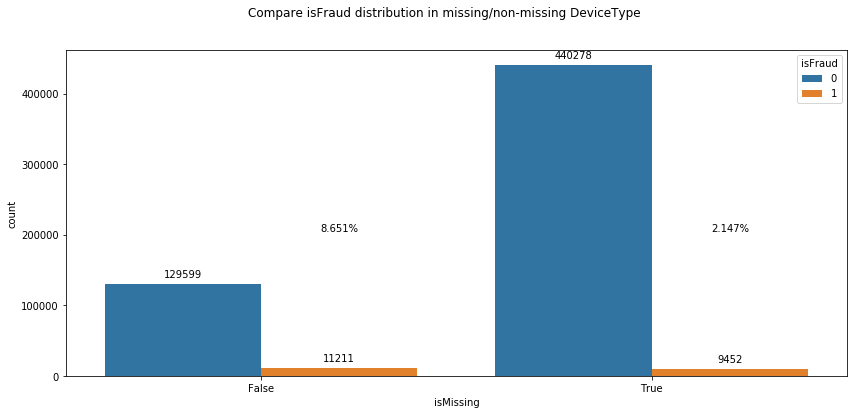

In [216]:
plt_compare_missing('DeviceType')

In [220]:
a = train.groupby('DeviceType')['isFraud'].mean()
a

DeviceType
desktop    0.065215
mobile     0.101662
Name: isFraud, dtype: float64

[110059, 459818, 8607, 12056]

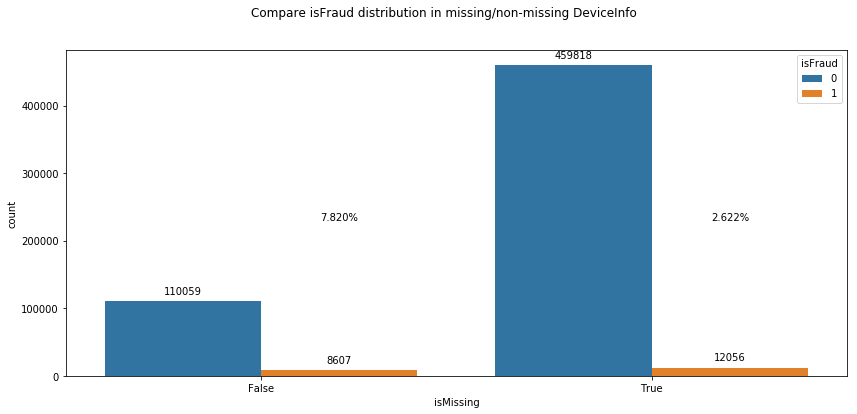

In [217]:
plt_compare_missing('DeviceInfo')

In [219]:
a = train.groupby('DeviceInfo')['isFraud'].mean()
a

DeviceInfo
0PAJ5                         0.000000
0PJA2                         0.000000
0PM92                         0.500000
1016S                         0.000000
2PQ93                         0.000000
2PS64 Build/NRD90M            0.000000
2PYB2                         0.000000
2PZC5                         0.000000
4003A                         0.000000
4009F                         0.000000
4013M Build/KOT49H            0.076923
4027A Build/KOT49H            0.000000
4034E                         0.000000
4034G                         0.000000
4047A Build/NRD90M            0.000000
4047G Build/NRD90M            0.058824
47418                         0.000000
5010G Build/MRA58K            0.100000
5010S Build/MRA58K            0.000000
5011A Build/NRD90M            0.125000
5012G Build/MRA58K            0.172414
5015A Build/LMY47I            0.236842
5017A                         0.000000
5025G Build/LMY47I            0.289474
5042A                         0.000000
5044A         

In [374]:
t=train[train['isFraud']==1]['DeviceInfo']
t.reset_index().groupby('DeviceInfo')['TransactionID'].count()

DeviceInfo
0PM92                                 2
4013M Build/KOT49H                    1
4047G Build/NRD90M                    1
5010G Build/MRA58K                    6
5011A Build/NRD90M                    3
5012G Build/MRA58K                    5
5015A Build/LMY47I                    9
5025G Build/LMY47I                   11
5049W Build/NRD90M                    6
5056A Build/MMB29M                    3
5085B Build/MRA58K                    2
6045I Build/LRX22G                    2
8062 Build/MRA58K                     1
9003A Build/MRA58K                    3
A466BG                                3
A5002                                 1
A574BL Build/NMF26F                   7
AERIAL                                1
ALCATEL                               1
ALE-L23 Build/HuaweiALE-L23          29
ALP-L09 Build/HUAWEIALP-L09           3
Alcatel_4060O Build/MMB29M            5
Alcatel_5044R Build/NRD90M            4
Alumini3 Build/MRA58K                 2
Android 5.1                  

In [ ]:
#to be continued for filling missing data ...........................................
################################################################################

In [24]:
from sklearn.model_selection import train_test_split
import lightgbm as lgb
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import LabelEncoder
import numpy as np
y = train['isFraud']
X = pd.DataFrame()

col=['TransactionDT','ProductCD','P_emaildomain','R_emaildomain','nulls','month','hour',
     'TransactionAmt', 'TransactionAmt_decimal','D5','D2','D8','D9','D11','D15','C1','C4','C8','C10','C13','C2',
     'V256','V13','card1','card2','card3','card4', 'card5', 'card6','addr1','M4','M5','M6','M1',
     'M2','M3','M7','M8','M9','DeviceType',
     'DeviceInfo', 'addr2','D6','D13','C5','C9','D7','C14','V145',
    'V3','V4','V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V17',
    'V19', 'V20', 'V29', 'V30', 'V33', 'V34', 'V35', 'V36', 'V37', 'V38', 'V40', 'V44', 'V45', 'V46', 'V47', 'V48',
    'V49', 'V51', 'V52', 'V53', 'V54', 'V56', 'V58', 'V59', 'V60', 'V61', 'V62', 'V63', 'V64', 'V69', 'V70', 'V71',
    'V72', 'V73', 'V74', 'V75', 'V76', 'V78', 'V80', 'V81', 'V82', 'V83', 'V84', 'V85', 'V87', 'V90', 'V91', 'V92',
    'V93', 'V94', 'V95', 'V96', 'V97', 'V99', 'V100', 'V126', 'V127', 'V128', 'V130', 'V131', 'V138', 'V139', 'V140',
    'V143', 'V146', 'V147', 'V149', 'V150', 'V151', 'V152', 'V154', 'V156', 'V158', 'V159', 'V160', 'V161',
    'V162', 'V163', 'V164', 'V165', 'V166', 'V167', 'V169', 'V170', 'V171', 'V172', 'V173', 'V175', 'V176', 'V177',
    'V178', 'V180', 'V182', 'V184', 'V187', 'V188', 'V189', 'V195', 'V197', 'V200', 'V201', 'V202', 'V203', 'V204',
    'V205', 'V206', 'V207', 'V208', 'V209', 'V210', 'V212', 'V213', 'V214', 'V215', 'V216', 'V217', 'V219', 'V220',
    'V221', 'V222', 'V223', 'V224', 'V225', 'V226', 'V227', 'V228', 'V229', 'V231', 'V233', 'V234', 'V238', 'V239',
    'V242', 'V243', 'V244', 'V245', 'V246', 'V247', 'V249', 'V251', 'V253', 'V257', 'V258', 'V259', 'V261',
    'V262', 'V263', 'V264', 'V265', 'V266', 'V267', 'V268', 'V270', 'V271', 'V272', 'V273', 'V274', 'V275', 'V276',
    'V277', 'V278', 'V279', 'V280', 'V282', 'V283', 'V285', 'V287', 'V288', 'V289', 'V291', 'V292', 'V294', 'V303',
    'V304', 'V306', 'V307', 'V308', 'V310', 'V312', 'V313', 'V314', 'V315', 'V317', 'V322', 
    'V323','V324', 'V326','V329','V331','V332', 'V333', 'V335', 'V336',
    'id_01', 'id_02', 'id_03', 'id_05', 'id_06', 'id_09',
    'id_11', 'id_12', 'id_13', 'id_14', 'id_15', 'id_17', 'id_19', 'id_20', 'id_30', 'id_31', 'id_32', 'id_33',
    'id_36', 'id_37', 'id_38','isFraud']

#'V48','V53','V96'
#  'V338'
#month is important
# Save to pickle 
New_DatasetName = "Basic"
#train[col].to_pickle("train_{}.pkl".format(New_DatasetName))
#test[col[:-1]].to_pickle("test_{}.pkl".format(New_DatasetName))
col.pop()
X[col] = train[col]

X['M4_count'] =X['M4'].map(pd.concat([train['M4'], test['M4']], ignore_index=True).value_counts(dropna=False))
X['M6_count'] =X['M6'].map(pd.concat([train['M6'], test['M6']], ignore_index=True).value_counts(dropna=False))
X['card1_count'] = X['card1'].map(pd.concat([train['card1'], test['card1']], ignore_index=True).value_counts(dropna=False))
X['card6_count'] =X['card6'].map(pd.concat([train['card6'], test['card6']], ignore_index=True).value_counts(dropna=False))

X['DeviceType_count'] =X['DeviceType'].map(pd.concat([train['DeviceType'], test['DeviceType']], ignore_index=True).value_counts(dropna=False))
#X['DeviceInfo_count'] =X['DeviceInfo'].map(pd.concat([train['DeviceInfo'], test['DeviceInfo']], ignore_index=True).value_counts(dropna=False))
X['ProductCD_count'] =X['ProductCD'].map(pd.concat([train['ProductCD'], test['ProductCD']], ignore_index=True).value_counts(dropna=False))
X['P_emaildomain_count'] =X['P_emaildomain'].map(pd.concat([train['P_emaildomain'], test['P_emaildomain']], ignore_index=True).value_counts(dropna=False))
#X['R_emaildomain_count'] =X['R_emaildomain'].map(pd.concat([train['R_emaildomain'], test['R_emaildomain']], ignore_index=True).value_counts(dropna=False))
X['addr1_count'] = X['addr1'].map(pd.concat([train['addr1'], test['addr1']], ignore_index=True).value_counts(dropna=False))

###X['addr1_y'] =X['addr1'].map(train.groupby(['addr1'])['isFraud'].mean())
#X['id_02_count'] = X['id_02'].map(pd.concatD.value_counts(dropna=False))
#X['id_17_count'] = X['id_17'].map(pd.concat([train['id_17'], test['id_17']], ignore_index=True).value_counts(dropna=False))
###X['id_02'].fillna(0, inplace=True)

# Risk mapping transformation
card4_dic = {'american express':287,'discover':773,'mastercard':343,'visa':348}
X['card4_dic']=X['card4'].map(card4_dic)
#train=train.replace({'card4':card4_dic})
#test=test.replace({'card4':card4_dic})
ProductCD_dic = {'C':117,'H':48,'R':38,'S':59,'W':20}
X['ProductCD_dic']=X['ProductCD'].map(ProductCD_dic)

#New feature:addr2 risk mapping
#addr2_dic={46:100,51:100,10:100,65:54,96:14,60:9,32:7,87:2}
#X['addr2_dic']=X['addr2'].map(addr2_dic)
#38:67,73:20,54:33,68:10,29:9,

#cross risk mapping for card4 vs ProductCD:
def func(i,j):
    if i=='american express' and j=='C':
        return 100
    elif i=='american express' and j=='H':
        return 6
    elif i=='american express' and j=='R':
        return 2
    elif i=='american express' and j=='S':
        return 6
    elif i=='discover' and j=='H':
        return 7
    elif i=='discover' and j=='R':
        return 5
    elif i=='discover' and j=='S':
        return 13
    elif i=='discover' and j=='W':
        return 8
    elif i=='mastercard' and j=='C':
        return 11
    elif i=='mastercard' and j=='H':
        return 5
    elif i=='mastercard' and j=='R':
        return 5
    elif i=='mastercard' and j=='S':
        return 5
    elif i=='mastercard' and j=='W':
        return 2
    elif i=='visa' and j=='C':
        return 12
    elif i=='visa' and j=='H':
        return 5
    elif i=='visa' and j=='R':
        return 4
    elif i=='visa' and j=='S':
        return 6
    elif i=='visa' and j=='W':
        return 2  
    
#X['cross'] =  X.apply(lambda x:func(x['card4'],x['ProductCD']),axis=1)

card6_dic = {'charge card':0,'credit':668,'debit':243,'debit or credit':0}
X['card6_dic']=X['card6'].map(card6_dic)
#train=train.replace({'card6':card6_dic})
#test=test.replace({'card6':card6_dic})

M1_dic={'F':0,'T':2}
X['M1_dic']=X['M1'].map(M1_dic)

M4_dic={'M0':4,'M1':3,'M2':13}
X['M4_dic']=X['M4'].map(M4_dic)

M5_dic={'F':2,'T':3}
X['M5_dic']=X['M5'].map(M5_dic)

M6_dic={'F':4,'T':3}
X['M6_dic']=X['M6'].map(M6_dic)

#DeviceInfo has many category levels
#DeviceType_dic={'desktop':3,'mobile':5}
#X['DeviceType_dic']=X['DeviceType'].map(DeviceType_dic)

P_emaildomain_dic={'protonmail.com':40,'mail.com':19,'outlook.es':13,'aim.com':12,
                    'outlook.com':9,'hotmail.es':7,'live.com.mx':5,'hotmail.com':5,'gmail.com':4}
X['P_emaildomain_dic']=X['P_emaildomain'].map(P_emaildomain_dic)


R_emaildomain_dic={'protonmail.com':95,'mail.com':38,'netzero.net':22,'outlook.com':17,
                    'outlook.es':13,'icloud.com':13,'gmail.com':12,'hotmail.com':8,
                    'earthlink.net':8,'earthlink.net':7,'hotmail.es':7,'live.com.mx':6,
                   'yahoo.com':5,'live.com':5}
X['R_emaildomain_dic']=X['R_emaildomain'].map(R_emaildomain_dic)

#New feature:C2 vs TransactionDT
def func_C2_Tran(a,b):
        if a<400:
            return 344
        elif a>=400 and a<=651 and b<=4000000:
            return 3846
        elif a>=400 and a<=651 and b>10000000:
            return 10000
        else:
            return 1082
X['C2_TransactionDT']=X.apply(lambda x:func_C2_Tran(x['C2'],x['TransactionDT']),axis=1)

for feature in ['id_30','id_06']:
        # Count encoded separately for train and test,
    X[feature + '_count'] = X[feature].map(pd.concat([train[feature], test[feature]], ignore_index=True).value_counts(dropna=False))


###sep 06,2019 add fill na:
X['D9'] = np.where(X['D9'].isna(),0,1)

########################### Reset values for "noise" card1
# i_cols = ['card1']

# for col in i_cols: 
#     valid_card = pd.concat([train[[col]], test[[col]]])
#     valid_card = valid_card[col].value_counts()
#     valid_card = valid_card[valid_card>2]
#     valid_card = list(valid_card.index)

#     X[col] = np.where(train[col].isin(test[col]), train[col], np.nan)
#     X[col] = np.where(X[col].isin(valid_card), X[col], np.nan)
# #     test_x[col]  = np.where(test_x[col].isin(train[col]), test_x[col], np.nan)
# #     test_x[col]  = np.where(test_x[col].isin(valid_card), test_x[col], np.nan)
  
    
########################## M columns (except M4)
#All these columns are binary encoded 1/0
#We can have some features from it
# i_cols = ['M1','M2','M3','M5','M6','M7','M8','M9']

# X['M_sum'] = X[i_cols].sum(axis=1).astype(np.int8)
# X['M_na'] = X[i_cols].isna().sum(axis=1).astype(np.int8)


# Check if the Transaction Amount is common or not (we can use freq encoding here)
# In our dialog with a model we are telling to trust or not to these values   
X['TransactionAmt_check'] = np.where(X['TransactionAmt'].isin(test['TransactionAmt']), 1, 0)

####################################Interaction term
train['uid'] = train['card1'].astype(str)+'_'+train['card2'].astype(str)
test['uid'] = test['card1'].astype(str)+'_'+test['card2'].astype(str)

train['uid2'] = train['uid'].astype(str)+'_'+train['card3'].astype(str)+'_'+train['card5'].astype(str)
test['uid2'] = test['uid'].astype(str)+'_'+test['card3'].astype(str)+'_'+test['card5'].astype(str)

train['uid3'] = train['uid2'].astype(str)+'_'+train['addr1'].astype(str)+'_'+train['addr2'].astype(str)
test['uid3'] = test['uid2'].astype(str)+'_'+test['addr1'].astype(str)+'_'+test['addr2'].astype(str)

X['uid'] = train['uid']
X['uid2'] = train['uid2']
X['uid3'] = train['uid3']

    ###########
for feature in ['uid','uid2','uid3']:
        # Count encoded separately for train and test,
    X[feature + '_count'] = X[feature].map(pd.concat([train[feature], test[feature]], 
                                                     ignore_index=True).value_counts(dropna=False))

# For our model current TransactionAmt is a noise
# https://www.kaggle.com/kyakovlev/ieee-check-noise
# (even if features importances are telling contrariwise)
# There are many unique values and model doesn't generalize well
# Lets do some aggregations

i_cols = ['card1','card2','card3','card5']
#'uid','uid2','uid3'
for col2 in i_cols:
    for agg_type in ['mean','std']:
        new_col_name = col2+'_TransactionAmt_'+agg_type
        temp_df = pd.concat([train[[col2, 'TransactionAmt']], test[[col2,'TransactionAmt']]])
        #temp_df['TransactionAmt'] = temp_df['TransactionAmt'].astype(int)
        temp_df = temp_df.groupby([col2])['TransactionAmt'].agg([agg_type]).reset_index().rename(
                                                columns={agg_type: new_col_name})
        
        temp_df.index = list(temp_df[col2])
        temp_df = temp_df[new_col_name].to_dict()   
    
        X[new_col_name] = X[col2].map(temp_df)
        
# i_cols2 = ['uid','uid2','uid3']

# for col3 in i_cols2:
#     for agg_type in ['mean','std']:
#         new_col_name = col3+'_TransactionAmt_'+agg_type
#         temp_df = pd.concat([X[[col3, 'TransactionAmt']], test[[col3,'TransactionAmt']]])
#         #temp_df['TransactionAmt'] = temp_df['TransactionAmt'].astype(int)
#         temp_df = temp_df.groupby([col3])['TransactionAmt'].agg([agg_type]).reset_index().rename(
#                                                 columns={agg_type: new_col_name}) 
#         temp_df.index = list(temp_df[col3])
#         temp_df = temp_df[new_col_name].to_dict()   
#         X[new_col_name] = X[col3].map(temp_df)        
           
# Small "hack" to transform distribution 
# (doesn't affect auc much, but I like it more)
# please see how distribution transformation can boost your score 
# (not our case but related)
# https://scikit-learn.org/stable/auto_examples/compose/plot_transformed_target.html

#X['TransactionAmt'] = np.log1p(X['TransactionAmt'])

for df in [train, test, X]:
    ########################### Device info
    df['DeviceInfo'] = df['DeviceInfo'].fillna('unknown_device').str.lower()
#    df['DeviceInfo_device'] = df['DeviceInfo'].apply(lambda x: ''.join([i for i in x if i.isalpha()]))
#    df['DeviceInfo_version'] = df['DeviceInfo'].apply(lambda x: ''.join([i for i in x if i.isnumeric()]))
    
#     ########################### Device info 2
#    df['id_30'] = df['id_30'].fillna('unknown_device').str.lower()
#    df['id_30_device'] = df['id_30'].apply(lambda x: ''.join([i for i in x if i.isalpha()]))
#    df['id_30_version'] = df['id_30'].apply(lambda x: ''.join([i for i in x if i.isnumeric()]))
    
#     ########################### Browser
#    df['id_31'] = df['id_31'].fillna('unknown_device').str.lower()
#     df['id_31_device'] = df['id_31'].apply(lambda x: ''.join([i for i in x if i.isalpha()]))


    
########label encoding category feature device
for col_le in ['DeviceInfo']:
    le = LabelEncoder()
    le.fit(list(train[col_le])+list(test[col_le]))  
    X[col_le]=le.transform(X[col_le])
    X[col_le]=X[col_le].astype('category')
    
########
    
X=X.drop(columns=['ProductCD','P_emaildomain','R_emaildomain','M4','M5','M6','M1', 'M2','M3','M7','M8','M9','card6', 'DeviceType',
                  'card4','id_02','id_19','id_20','id_17','C2','TransactionDT','addr2','D6','D13','C5','C9','D7','C14',
                  'id_12', 'id_15','id_30','id_31', 'id_33', 'id_36', 'id_37', 'id_38','uid','uid2','uid3'
                 ])

In [25]:
X['addr1'].fillna(0, inplace=True)
#X['addr2_dic'].fillna(3, inplace=True)
#X['addr2'].fillna(96, inplace=True)
#X['D5'].fillna(150, inplace=True)
X['D2'].fillna(10, inplace=True)
X['D11'].fillna(10, inplace=True)
X['D15'].fillna(376, inplace=True)

#X['V1'].fillna(X['V1'].mode()[0], inplace=True)          
#X['V2'].fillna(3, inplace=True)

X['V13'].fillna(X['V13'].mode()[0], inplace=True)
 #fillna reduce score
#X['V263'].fillna(X['V263'].mode()[0], inplace=True)
#X['V256'].fillna(X['V256'].mode()[0], inplace=True)

X['card2'].fillna(502, inplace=True)
###X['card3'].fillna(150, inplace=True)
X['card4_dic'].fillna(X['card4_dic'].mode()[0], inplace=True)
                   
X['M4_dic'].fillna(2, inplace=True)
X['M5_dic'].fillna(3, inplace=True)  #24:18:78
X['M6_dic'].fillna(13, inplace=True)  #24:18:78

#X['cross'].fillna(2.6, inplace=True)

#X['id_19'].fillna(444, inplace=True)
#X['id_20'].fillna(266, inplace=True)
#X['id_17'].fillna(133, inplace=True)
X['P_emaildomain_dic'].fillna(0, inplace=True)
X['R_emaildomain_dic'].fillna(0, inplace=True)

#sep 04,2019 add fill na:
#X['V145'].fillna(0, inplace=True)  #V145 has more than 80% missing
X['V19'].fillna(0, inplace=True)
X['V36'].fillna(0, inplace=True)
X['V64'].fillna(0, inplace=True)
X['V70'].fillna(0, inplace=True)
X['V80'].fillna(0, inplace=True)
X['V94'].fillna(0, inplace=True)
# X['V143'].fillna(0, inplace=True)
# X['V150'].fillna(0, inplace=True)
# X['V152'].fillna(0, inplace=True)
X['V158'].fillna(0, inplace=True)##
# X['V163'].fillna(0, inplace=True)
# X['V165'].fillna(0, inplace=True)
# X['V177'].fillna(0, inplace=True)
# X['V204'].fillna(0, inplace=True)
# X['V207'].fillna(0, inplace=True)
# X['V209'].fillna(0, inplace=True) ##
# X['V221'].fillna(0, inplace=True)
# X['V222'].fillna(0, inplace=True)
# X['V266'].fillna(0, inplace=True)
# X['V267'].fillna(0, inplace=True)
# X['V274'].fillna(0, inplace=True)
# X['V275'].fillna(0, inplace=True)
X['V279'].fillna(0, inplace=True)
X['V283'].fillna(0, inplace=True)
#X['id_30_count'].fillna(0, inplace=True)


In [26]:
#train test split
X_train, X_test, y_train, y_test = train_test_split(X, 
                             y, test_size=0.33, random_state=47, shuffle=False)

In [27]:
# params = {'boosting_type':'gbdt', 'class_weight':None, 'colsample_bytree':1.0,
#         'importance_type':'split', 'learning_rate':0.05, 'max_depth':20,
#         'min_child_samples':20, 'min_child_weight':0.001, 'min_split_gain':0.0,
#         'n_estimators':300, 'n_jobs':-1, 'num_leaves':300, 'silent':False, 'subsample':1,
#           'reg_alpha':0.0, 'reg_lambda':0.0,'subsample_for_bin':200000, 'subsample_freq':0,
#         'objective': 'binary', "bagging_seed": 8, 'metric': 'auc', 'random_state': 47}

params = {'boosting_type':'gbdt', 'class_weight':None, 'colsample_bytree':0.7,
        'importance_type':'split', 'learning_rate':0.05, 'max_depth':25,
        'min_child_samples':20, 'min_child_weight':0.00298, 'min_split_gain':0.0,
        'n_estimators':300, 'n_jobs':-1, 'num_leaves':2**8, 'silent':False, 'subsample':0.7,
          'reg_alpha':0.38999, 'reg_lambda':2.0,'subsample_for_bin':200000, 'subsample_freq':1,
        'objective': 'binary', "bagging_seed": 8, 'metric': 'auc', 'random_state': 47}
 
      
                
clf = lgb.LGBMClassifier(**params)
clf.fit(X_train, y_train)
roc_auc_score(y_test, clf.predict_proba(X_test)[:, 1])
# clf.fit(upsampled.drop(columns=['isFraud']),upsampled['isFraud'])
# X_test=X_test.drop(columns=['TransactionDT'])
# roc_auc_score(y_test, clf.predict_proba(X_test)[:, 1])

0.9188116100777122

In [23]:
roc_auc_score(y_test, clf.predict_proba(X_test)[:, 1])

0.9212473430497328

In [391]:
for i in X.columns:
    print(i,end=' ')

nulls month hour TransactionAmt TransactionAmt_decimal D5 D2 D8 D9 D11 D15 C1 C4 C8 C10 C13 V256 V13 card1 card2 card3 card5 addr1 DeviceInfo V145 V3 V4 V5 V6 V7 V8 V9 V10 V11 V12 V17 V19 V20 V29 V30 V33 V34 V35 V36 V37 V38 V40 V44 V45 V46 V47 V48 V49 V51 V52 V53 V54 V56 V58 V59 V60 V61 V62 V63 V64 V69 V70 V71 V72 V73 V74 V75 V76 V78 V80 V81 V82 V83 V84 V85 V87 V90 V91 V92 V93 V94 V95 V96 V97 V99 V100 V126 V127 V128 V130 V131 V138 V139 V140 V143 V146 V147 V149 V150 V151 V152 V154 V156 V158 V159 V160 V161 V162 V163 V164 V165 V166 V167 V169 V170 V171 V172 V173 V175 V176 V177 V178 V180 V182 V184 V187 V188 V189 V195 V197 V200 V201 V202 V203 V204 V205 V206 V207 V208 V209 V210 V212 V213 V214 V215 V216 V217 V219 V220 V221 V222 V223 V224 V225 V226 V227 V228 V229 V231 V233 V234 V238 V239 V242 V243 V244 V245 V246 V247 V249 V251 V253 V257 V258 V259 V261 V262 V263 V264 V265 V266 V267 V268 V270 V271 V272 V273 V274 V275 V276 V277 V278 V279 V280 V282 V283 V285 V287 V288 V289 V291 V292 V294 V303 V304 

In [ ]:
#%%
def addfeature(var):
    
    y = train['isFraud']
    X = pd.DataFrame()
    
    col=['TransactionDT','ProductCD','P_emaildomain','R_emaildomain','nulls','month','hour',
         'TransactionAmt', 'TransactionAmt_decimal','D5','D2','D8','D9','D11','D15','C1','C4','C8','C10','C13','C2',
         'V256','V13','card1','card2','card3','card4', 'card5', 'card6','addr1','M4','M5','M6','M1','DeviceType',
         'DeviceInfo', 'id_02','id_19','id_20','id_17','addr2','D6','D13','C5','C9','D7','C14','V145'
        ]+[var]
    
    X[col] = train[col]
    
    print('preprocessing including '+ var)
    
    X['M4_count'] =X['M4'].map(pd.concat([train['M4'], test['M4']], ignore_index=True).value_counts(dropna=False))
    X['M6_count'] =X['M6'].map(pd.concat([train['M6'], test['M6']], ignore_index=True).value_counts(dropna=False))
    X['card1_count'] = X['card1'].map(pd.concat([train['card1'], test['card1']], ignore_index=True).value_counts(dropna=False))
    X['card6_count'] =X['card6'].map(pd.concat([train['card6'], test['card6']], ignore_index=True).value_counts(dropna=False))
    
    X['DeviceType_count'] =X['DeviceType'].map(pd.concat([train['DeviceType'], test['DeviceType']], ignore_index=True).value_counts(dropna=False))
    #X['DeviceInfo_count'] =X['DeviceInfo'].map(pd.concat([train['DeviceInfo'], test['DeviceInfo']], ignore_index=True).value_counts(dropna=False))
    X['ProductCD_count'] =X['ProductCD'].map(pd.concat([train['ProductCD'], test['ProductCD']], ignore_index=True).value_counts(dropna=False))
    X['P_emaildomain_count'] =X['P_emaildomain'].map(pd.concat([train['P_emaildomain'], test['P_emaildomain']], ignore_index=True).value_counts(dropna=False))
    #X['R_emaildomain_count'] =X['R_emaildomain'].map(pd.concat([train['R_emaildomain'], test['R_emaildomain']], ignore_index=True).value_counts(dropna=False))
    X['addr1_count'] = X['addr1'].map(pd.concat([train['addr1'], test['addr1']], ignore_index=True).value_counts(dropna=False))
       
    # Risk mapping transformation
    card4_dic = {'american express':287,'discover':773,'mastercard':343,'visa':348}
    X['card4_dic']=X['card4'].map(card4_dic)
    #train=train.replace({'card4':card4_dic})
    #test=test.replace({'card4':card4_dic})
    ProductCD_dic = {'C':117,'H':48,'R':38,'S':59,'W':20}
    X['ProductCD_dic']=X['ProductCD'].map(ProductCD_dic)
    
    
    card6_dic = {'charge card':0,'credit':668,'debit':243,'debit or credit':0}
    X['card6_dic']=X['card6'].map(card6_dic)
    #train=train.replace({'card6':card6_dic})
    #test=test.replace({'card6':card6_dic})
    
    M1_dic={'F':0,'T':2}
    X['M1_dic']=X['M1'].map(M1_dic)
    
    M4_dic={'M0':4,'M1':3,'M2':13}
    X['M4_dic']=X['M4'].map(M4_dic)
    
    M5_dic={'F':2,'T':3}
    X['M5_dic']=X['M5'].map(M5_dic)
    
    M6_dic={'F':4,'T':3}
    X['M6_dic']=X['M6'].map(M6_dic)
      
    P_emaildomain_dic={'protonmail.com':40,'mail.com':19,'outlook.es':13,'aim.com':12,
                        'outlook.com':9,'hotmail.es':7,'live.com.mx':5,'hotmail.com':5,'gmail.com':4}
    X['P_emaildomain_dic']=X['P_emaildomain'].map(P_emaildomain_dic)
    
    
    R_emaildomain_dic={'protonmail.com':95,'mail.com':38,'netzero.net':22,'outlook.com':17,
                        'outlook.es':13,'icloud.com':13,'gmail.com':12,'hotmail.com':8,
                        'earthlink.net':8,'earthlink.net':7,'hotmail.es':7,'live.com.mx':6,
                       'yahoo.com':5,'live.com':5}
    X['R_emaildomain_dic']=X['R_emaildomain'].map(R_emaildomain_dic)
    
    #New feature:C2 vs TransactionDT
#    def func_C2_Tran(a,b):
#            if a<400:
#                return 344
#            elif a>=400 and a<=651 and b<=4000000:
#                return 3846
#            elif a>=400 and a<=651 and b>10000000:
#                return 10000
#            else:
#                return 1082
#    X['C2_TransactionDT']=X.apply(lambda x:func_C2_Tran(x['C2'],x['TransactionDT']),axis=1)
#    
    X=X.drop(columns=['ProductCD','P_emaildomain','R_emaildomain','M4','M5','M6','M1',
                      'card6', 'DeviceType','DeviceInfo','card4','id_02','id_19',
                      'id_20','id_17','C2','TransactionDT','addr2','D6','D13','C5',
                      'C9','D7','C14'])
    print('start traing with '+var)
    X_train, X_test, y_train, y_test = train_test_split(X, 
                             y, test_size=0.33, random_state=47, shuffle=False)

    clf = lgb.LGBMClassifier(**params)
    clf.fit(X_train, y_train)
    score=roc_auc_score(y_test, clf.predict_proba(X_test)[:, 1])
    print(score)
    return score
    
res=[]
ls=['V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V17',
     'V19', 'V20', 'V29', 'V30', 'V33', 'V34', 'V35', 'V36', 'V37', 'V38', 'V40', 'V44', 'V45', 'V46', 'V47', 'V48',
     'V49', 'V51', 'V52', 'V53', 'V54', 'V56', 'V58', 'V59', 'V60', 'V61', 'V62', 'V63', 'V64', 'V69', 'V70', 'V71',
     'V72', 'V73', 'V74', 'V75', 'V76', 'V78', 'V80', 'V81', 'V82', 'V83', 'V84', 'V85', 'V87', 'V90', 'V91', 'V92',
     'V93', 'V94', 'V95', 'V96', 'V97', 'V99', 'V100', 'V126', 'V127', 'V128', 'V130', 'V131', 'V138', 'V139', 'V140',
     'V143', 'V146', 'V147', 'V149', 'V150', 'V151', 'V152', 'V154', 'V156', 'V158', 'V159', 'V160', 'V161',
     'V162', 'V163', 'V164', 'V165', 'V166', 'V167', 'V169', 'V170', 'V171', 'V172', 'V173', 'V175', 'V176', 'V177',
     'V178', 'V180', 'V182', 'V184', 'V187', 'V188', 'V189', 'V195', 'V197', 'V200', 'V201', 'V202', 'V203', 'V204',
     'V205', 'V206', 'V207', 'V208', 'V209', 'V210', 'V212', 'V213', 'V214', 'V215', 'V216', 'V217', 'V219', 'V220',
     'V221', 'V222', 'V223', 'V224', 'V225', 'V226', 'V227', 'V228', 'V229', 'V231', 'V233', 'V234', 'V238', 'V239',
     'V242', 'V243', 'V244', 'V245', 'V246', 'V247', 'V249', 'V251', 'V253', 'V257', 'V258', 'V259', 'V261',
     'V262', 'V263', 'V264', 'V265', 'V266', 'V267', 'V268', 'V270', 'V271', 'V272', 'V273', 'V274', 'V275', 'V276',
     'V277', 'V278', 'V279', 'V280', 'V282', 'V283', 'V285', 'V287', 'V288', 'V289', 'V291', 'V292', 'V294', 'V303',
     'V304', 'V306', 'V307', 'V308', 'V310', 'V312', 'V313', 'V314', 'V315', 'V317', 'V322']
for i in ls:
    res.append(addfeature(i))
    

In [270]:
#Handling imbalance data 

#ADASYN:After creating those sample it adds a random small values to the points 
#       thus making it more realistic.

#'minority': resample only the minority class;
#'not minority': resample all classes but the minority class;
#'not majority': resample all classes but the majority class;
#'all': resample all classes;
# When dict, the keys correspond to the targeted classes. The values correspond to
# the desired number of samples for each targeted class.`b

from imblearn.over_sampling import SMOTE
#from imblearn.over_sampling import ADASYN
# setting up testing and training sets
sm = SMOTE(sampling_strategy='minority',random_state=27,ratio=0.3)
#sm=ADASYN()

X_train, y_train = sm.fit_sample(X_train, y_train)
X_test, y_test = sm.fit_sample(X_test, y_test)
#X,y=sm.fit_sample(X,y)

In [167]:
#Resampling Techniques — Oversample minority class
from sklearn.utils import resample

# concatenate our training data back together
X_train = pd.concat([X_train, y_train], axis=1)

# separate minority and majority classes
not_fraud = X_train[X_train.isFraud==0]
fraud = X_train[X_train.isFraud==1]

# upsample minority
fraud_upsampled = resample(fraud,
                          replace=True, # sample with replacement
                          n_samples=len(not_fraud), # match number in majority class
                          random_state=27) # reproducible results

# combine majority and upsampled minority
upsampled = pd.concat([not_fraud, fraud_upsampled])

# check new class counts
upsampled.isFraud.value_counts()

1    381992
0    381992
Name: isFraud, dtype: int64

In [169]:
#need to sort upsampled data by time, since in last step dataframe is concat not_fraud and then fraud_upsampled
#upsampled=upsampled.sort_values(by=['TransactionDT'])
upsampled=upsampled.drop(columns=['TransactionDT'])
upsampled.columns

Index(['nulls', 'month', 'hour', 'TransactionAmt_decimal', 'D5', 'D2', 'D11',
       'D15', 'C1', 'C4', 'C8', 'C10', 'C13', 'V1', 'V2', 'V13', 'V263',
       'card1', 'card2', 'card3', 'addr1', 'M4_count', 'M6_count',
       'card1_count', 'card6_count', 'ProductCD_count', 'P_emaildomain_count',
       'R_emaildomain_count', 'addr1_count', 'card4_dic', 'ProductCD_dic',
       'cross', 'M4_dic', 'M6_dic', 'R_emaildomain_dic', 'isFraud'],
      dtype='object')

In [123]:
# Running this for checking overfitting issues
roc_auc_score(y_train, clf.predict_proba(X_train)[:, 1])

0.9999860481531135

In [30]:
#for prediction on test dataset
test_x=pd.DataFrame()
test_x[col] = test[col]

test_x['M4_count'] =test_x['M4'].map(pd.concat([train['M4'], test['M4']], ignore_index=True).value_counts(dropna=False))
test_x['M6_count'] =test_x['M6'].map(pd.concat([train['M6'], test['M6']], ignore_index=True).value_counts(dropna=False))
test_x['card1_count'] = test_x['card1'].map(pd.concat([train['card1'], test['card1']], ignore_index=True).value_counts(dropna=False))
test_x['card6_count'] = test_x['card6'].map(pd.concat([train['card6'], test['card6']], ignore_index=True).value_counts(dropna=False))

test_x['addr1_count'] = test_x['addr1'].map(pd.concat([train['addr1'], test['addr1']], ignore_index=True).value_counts(dropna=False))
test_x['ProductCD_count'] =test_x['ProductCD'].map(pd.concat([train['ProductCD'], test['ProductCD']], ignore_index=True).value_counts(dropna=False))
test_x['P_emaildomain_count'] =test_x['P_emaildomain'].map(pd.concat([train['P_emaildomain'], test['P_emaildomain']], ignore_index=True).value_counts(dropna=False))
#test_x['R_emaildomain_count'] =test_x['R_emaildomain'].map(pd.concat([train['R_emaildomain'], test['R_emaildomain']], ignore_index=True).value_counts(dropna=False))
test_x['DeviceType_count'] =test_x['DeviceType'].map(pd.concat([train['DeviceType'], test['DeviceType']], ignore_index=True).value_counts(dropna=False))

# Risk mapping transformation
test_x['card4_dic']=test_x['card4'].map(card4_dic)
test_x['card6_dic']=test_x['card6'].map(card6_dic)
test_x['ProductCD_dic']=test_x['ProductCD'].map(ProductCD_dic)
#test_x['cross'] =  test_x.apply(lambda x:func(x['card4'],x['ProductCD']),axis=1)
M1_dic={'F':0,'T':2}
test_x['M1_dic']=test_x['M1'].map(M1_dic)
M4_dic={'M0':4,'M1':3,'M2':13}
test_x['M4_dic']=test_x['M4'].map(M4_dic)
M5_dic={'F':2,'T':3}
test_x['M5_dic']=test_x['M5'].map(M5_dic)
M6_dic={'F':4,'T':3}
test_x['M6_dic']=test_x['M6'].map(M6_dic)
test_x['R_emaildomain_dic']=test_x['R_emaildomain'].map(R_emaildomain_dic)
test_x['P_emaildomain_dic']=test_x['P_emaildomain'].map(P_emaildomain_dic)
test_x['C2_TransactionDT']=test_x.apply(lambda x:func_C2_Tran(x['C2'],x['TransactionDT']),axis=1)

for feature in [ 'id_30','id_06']:
       # Count encoded separately for train and test 'id_12', 'id_15','id_31', 'id_33', 'id_36', 'id_37', 'id_38'
    test_x[feature + '_count'] = test_x[feature].map(pd.concat([train[feature], test[feature]], 
                                                               ignore_index=True).value_counts(dropna=False))


###sep 06,2019 add fill na:
test_x['D9'] = np.where(test_x['D9'].isna(),0,1)

########################### Reset values for "noise" card1
# i_cols = ['card1']

# for col in i_cols: 
#     valid_card = pd.concat([train[[col]], test[[col]]])
#     valid_card = valid_card[col].value_counts()
#     valid_card = valid_card[valid_card>2]
#     valid_card = list(valid_card.index)

#     test_x[col]  = np.where(test_x[col].isin(train[col]), test_x[col], np.nan)
#     test_x[col]  = np.where(test_x[col].isin(valid_card), test_x[col], np.nan)
  
########################## M columns (except M4)
#All these columns are binary encoded 1/0
#We can have some features from it
# i_cols = ['M1','M2','M3','M5','M6','M7','M8','M9']

# test_x['M_sum'] = test_x[i_cols].sum(axis=1).astype(np.int8)
# test_x['M_na'] = test_x[i_cols].isna().sum(axis=1).astype(np.int8)


####################################Interaction term

test_x['uid'] = test['uid']
test_x['uid2'] = test['uid2']
test_x['uid3'] = test['uid3']


###########
for feature in ['uid','uid2','uid3']:
        # Count encoded separately for train and test,
    test_x[feature + '_count'] = test_x[feature].map(pd.concat([train[feature], test[feature]], 
                                                               ignore_index=True).value_counts(dropna=False))

# Check if the Transaction Amount is common or not (we can use freq encoding here)
# In our dialog with a model we are telling to trust or not to these values   

test_x['TransactionAmt_check']  = np.where(test_x['TransactionAmt'].isin(train['TransactionAmt']), 1, 0)

# For our model current TransactionAmt is a noise
# https://www.kaggle.com/kyakovlev/ieee-check-noise
# (even if features importances are telling contrariwise)
# There are many unique values and model doesn't generalize well
# Lets do some aggregations

i_cols = ['card1','card2','card3','card5']

for col2 in i_cols:
    for agg_type in ['mean','std']:
        new_col_name = col2+'_TransactionAmt_'+agg_type
        temp_df = pd.concat([train[[col2, 'TransactionAmt']], test[[col2,'TransactionAmt']]])
        #temp_df['TransactionAmt'] = temp_df['TransactionAmt'].astype(int)
        temp_df = temp_df.groupby([col2])['TransactionAmt'].agg([agg_type]).reset_index().rename(
                                                columns={agg_type: new_col_name})
        
        temp_df.index = list(temp_df[col2])
        temp_df = temp_df[new_col_name].to_dict()   
    
        test_x[new_col_name]  = test_x[col2].map(temp_df)
        
# i_cols2 = ['uid','uid2','uid3']

# for col3 in i_cols2:
#     for agg_type in ['mean','std']:
#         new_col_name = col3+'_TransactionAmt_'+agg_type
#         temp_df = pd.concat([X[[col3, 'TransactionAmt']], test[[col3,'TransactionAmt']]])
#         #temp_df['TransactionAmt'] = temp_df['TransactionAmt'].astype(int)
#         temp_df = temp_df.groupby([col3])['TransactionAmt'].agg([agg_type]).reset_index().rename(
#                                                 columns={agg_type: new_col_name})
        
#         temp_df.index = list(temp_df[col3])
#         temp_df = temp_df[new_col_name].to_dict()   
    
#         test_x[new_col_name] = test_x[col3].map(temp_df) 
                   

# Small "hack" to transform distribution 
# (doesn't affect auc much, but I like it more)
# please see how distribution transformation can boost your score 
# (not our case but related)
# https://scikit-learn.org/stable/auto_examples/compose/plot_transformed_target.html

#test_x['TransactionAmt'] = np.log1p(test_x['TransactionAmt']) 

########################### Device info
test_x['DeviceInfo'] = test_x['DeviceInfo'].fillna('unknown_device').str.lower()
# test_x['DeviceInfo_device'] = test_x['DeviceInfo'].apply(lambda x: ''.join([i for i in x if i.isalpha()]))
# test_x['DeviceInfo_version'] = test_x['DeviceInfo'].apply(lambda x: ''.join([i for i in x if i.isnumeric()]))

# ########################### Device info 2
# test_x['id_30'] = test_x['id_30'].fillna('unknown_device').str.lower()
# test_x['id_30_device'] = test_x['id_30'].apply(lambda x: ''.join([i for i in x if i.isalpha()]))
# test_x['id_30_version'] = test_x['id_30'].apply(lambda x: ''.join([i for i in x if i.isnumeric()]))

# ########################### Browser
# test_x['id_31'] = test_x['id_31'].fillna('unknown_device').str.lower()
# test_x['id_31_device'] = test_x['id_31'].apply(lambda x: ''.join([i for i in x if i.isalpha()]))

########label encoding category feature device
for col_le in ['DeviceInfo']:
    le = LabelEncoder()
    le.fit(list(train[col_le])+list(test[col_le]))  
    test_x[col_le]=le.transform(test_x[col_le])
    test_x[col_le]=test_x[col_le].astype('category')


    
test_x=test_x.drop(columns=['ProductCD','P_emaildomain','R_emaildomain','M4','M5','M6','M1', 'M2','M3','M7','M8','M9','card6', 'DeviceType',
                  'card4','id_02','id_19','id_20','id_17','C2','TransactionDT','addr2','D6','D13','C5','C9','D7','C14',
                  'id_12', 'id_15', 'id_30', 'id_31', 'id_33', 'id_36', 'id_37', 'id_38','uid','uid2','uid3'])

In [34]:
#filling missing in test data
test_x['addr1'].fillna(0, inplace=True)
##test_x['D5'].fillna(150, inplace=True)
test_x['D2'].fillna(10, inplace=True)
test_x['D11'].fillna(10, inplace=True)
test_x['D15'].fillna(376, inplace=True)
#test_x['V1'].fillna(test_x['V1'].mode()[0], inplace=True)
#test_x['V2'].fillna(3, inplace=True)
test_x['V13'].fillna(test_x['V13'].mode()[0], inplace=True)
##test_x['V256'].fillna(test_x['V256'].mode()[0], inplace=True)

test_x['card2'].fillna(502, inplace=True)
test_x['card4_dic'].fillna(test_x['card4_dic'].mode()[0], inplace=True)

test_x['M4_dic'].fillna(2, inplace=True)
test_x['M5_dic'].fillna(3, inplace=True)  #24:18:78
test_x['M6_dic'].fillna(13, inplace=True)  #24:18:78
test_x['P_emaildomain_dic'].fillna(0, inplace=True)
test_x['R_emaildomain_dic'].fillna(0, inplace=True)

# test_x['V145'].fillna(0, inplace=True)
test_x['V19'].fillna(0, inplace=True)
test_x['V36'].fillna(0, inplace=True)
test_x['V64'].fillna(0, inplace=True)
test_x['V70'].fillna(0, inplace=True)
test_x['V80'].fillna(0, inplace=True)
test_x['V94'].fillna(0, inplace=True)
# test_x['V143'].fillna(0, inplace=True)
# test_x['V150'].fillna(0, inplace=True)
# test_x['V152'].fillna(0, inplace=True)
test_x['V158'].fillna(0, inplace=True)##
# test_x['V163'].fillna(0, inplace=True)
# test_x['V165'].fillna(0, inplace=True)
# test_x['V177'].fillna(0, inplace=True)
# test_x['V204'].fillna(0, inplace=True)
# test_x['V207'].fillna(0, inplace=True)
# test_x['V209'].fillna(0, inplace=True) ##
# test_x['V221'].fillna(0, inplace=True)
# test_x['V222'].fillna(0, inplace=True)
# test_x['V266'].fillna(0, inplace=True)
# test_x['V267'].fillna(0, inplace=True)
# test_x['V274'].fillna(0, inplace=True)
# test_x['V275'].fillna(0, inplace=True)
test_x['V279'].fillna(0, inplace=True)
test_x['V283'].fillna(0, inplace=True)
#test_x['id_30_count'].fillna(0, inplace=True)

In [363]:
#if use SMOTE, dateframe will change to np ndarray..
# X=np.delete(X, 0, axis=1)
# clf.fit(X, y)
clf.fit(X, y)
params['learning_rate'] = 0.005
params['n_estimators'] = 1800
params['early_stopping_rounds'] = 100    
test_predictions = make_predictions(train_df, test_df, features_columns, TARGET, params, NFOLDS=10)


LGBMClassifier(bagging_seed=8, boosting_type='gbdt', class_weight=None,
        colsample_bytree=1.0, importance_type='split', learning_rate=0.05,
        max_depth=20, metric='auc', min_child_samples=20,
        min_child_weight=0.001, min_split_gain=0.0, n_estimators=300,
        n_jobs=-1, num_leaves=300, objective='binary', random_state=47,
        reg_alpha=0.0, reg_lambda=0.0, silent=False, subsample=1,
        subsample_for_bin=200000, subsample_freq=0)

In [544]:
from sklearn.model_selection import GridSearchCV
lg = lgb.LGBMClassifier(silent=False)
param_dist = {"max_depth": [25],             #<=0 means no limit
              "learning_rate" : [0.05],
              "num_leaves": [2**8],
              "n_estimators": [300],
              'min_child_samples':[20],
              'bagging_fraction': [0.42],
              'feature_fraction': [0.38],
               'min_child_weight': [0.00298],
               'min_data_in_leaf': [106],
               'reg_alpha': [0.38999],
               'reg_lambda': [2.0]  
#               param_dist = {"max_depth": [5,25,-1,50],    #<=0 means no limit
#               "learning_rate" : [0.05,0.00688,0.01],
#               "num_leaves": [300, 491,382,2**8],
#               "n_estimators": [300,800],
#               'min_child_samples':[20],
#               'bagging_fraction': [0.42,0.9],
#               'feature_fraction': [0.38,0.9],
#                'min_child_weight': [0.00298,0.03454],
#                'min_data_in_leaf': [20,30,106],
#                'reg_alpha': [1.0,0.38999],
#                'reg_lambda': [2.0,0.6485],
              
#                     'colsample_bytree': 0.7,
#                     'subsample_freq':1,
#                     'subsample':0.7,
#                     'max_bin':255,
#                     'verbose':-1,
#                     'seed': SEED,
#                     'early_stopping_rounds':100, 
             }
grid_search = GridSearchCV(lg, param_grid=param_dist, cv = 3, scoring="roc_auc", verbose=5)
grid_search.fit(X_train,y_train)
grid_search.best_estimator_

Fitting 3 folds for each of 3 candidates, totalling 9 fits
[CV] bagging_fraction=0.42, feature_fraction=0.38, learning_rate=0.05, max_depth=25, min_child_samples=20, min_child_weight=0.00298, min_data_in_leaf=20, n_estimators=300, num_leaves=256, reg_alpha=1.0, reg_lambda=2.0 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  bagging_fraction=0.42, feature_fraction=0.38, learning_rate=0.05, max_depth=25, min_child_samples=20, min_child_weight=0.00298, min_data_in_leaf=20, n_estimators=300, num_leaves=256, reg_alpha=1.0, reg_lambda=2.0, score=0.9155938108720448, total=  58.3s
[CV] bagging_fraction=0.42, feature_fraction=0.38, learning_rate=0.05, max_depth=25, min_child_samples=20, min_child_weight=0.00298, min_data_in_leaf=20, n_estimators=300, num_leaves=256, reg_alpha=1.0, reg_lambda=2.0 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  1.3min remaining:    0.0s


[CV]  bagging_fraction=0.42, feature_fraction=0.38, learning_rate=0.05, max_depth=25, min_child_samples=20, min_child_weight=0.00298, min_data_in_leaf=20, n_estimators=300, num_leaves=256, reg_alpha=1.0, reg_lambda=2.0, score=0.720943875484418, total= 1.1min
[CV] bagging_fraction=0.42, feature_fraction=0.38, learning_rate=0.05, max_depth=25, min_child_samples=20, min_child_weight=0.00298, min_data_in_leaf=20, n_estimators=300, num_leaves=256, reg_alpha=1.0, reg_lambda=2.0 


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:  2.6min remaining:    0.0s


[CV]  bagging_fraction=0.42, feature_fraction=0.38, learning_rate=0.05, max_depth=25, min_child_samples=20, min_child_weight=0.00298, min_data_in_leaf=20, n_estimators=300, num_leaves=256, reg_alpha=1.0, reg_lambda=2.0, score=0.9061144851711248, total=  52.3s
[CV] bagging_fraction=0.42, feature_fraction=0.38, learning_rate=0.05, max_depth=25, min_child_samples=20, min_child_weight=0.00298, min_data_in_leaf=30, n_estimators=300, num_leaves=256, reg_alpha=1.0, reg_lambda=2.0 


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:  3.8min remaining:    0.0s


[CV]  bagging_fraction=0.42, feature_fraction=0.38, learning_rate=0.05, max_depth=25, min_child_samples=20, min_child_weight=0.00298, min_data_in_leaf=30, n_estimators=300, num_leaves=256, reg_alpha=1.0, reg_lambda=2.0, score=0.914541040907472, total= 1.0min
[CV] bagging_fraction=0.42, feature_fraction=0.38, learning_rate=0.05, max_depth=25, min_child_samples=20, min_child_weight=0.00298, min_data_in_leaf=30, n_estimators=300, num_leaves=256, reg_alpha=1.0, reg_lambda=2.0 


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:  5.1min remaining:    0.0s


[CV]  bagging_fraction=0.42, feature_fraction=0.38, learning_rate=0.05, max_depth=25, min_child_samples=20, min_child_weight=0.00298, min_data_in_leaf=30, n_estimators=300, num_leaves=256, reg_alpha=1.0, reg_lambda=2.0, score=0.7133613413069566, total=  50.1s
[CV] bagging_fraction=0.42, feature_fraction=0.38, learning_rate=0.05, max_depth=25, min_child_samples=20, min_child_weight=0.00298, min_data_in_leaf=30, n_estimators=300, num_leaves=256, reg_alpha=1.0, reg_lambda=2.0 
[CV]  bagging_fraction=0.42, feature_fraction=0.38, learning_rate=0.05, max_depth=25, min_child_samples=20, min_child_weight=0.00298, min_data_in_leaf=30, n_estimators=300, num_leaves=256, reg_alpha=1.0, reg_lambda=2.0, score=0.905854261982459, total=  49.0s
[CV] bagging_fraction=0.42, feature_fraction=0.38, learning_rate=0.05, max_depth=25, min_child_samples=20, min_child_weight=0.00298, min_data_in_leaf=106, n_estimators=300, num_leaves=256, reg_alpha=1.0, reg_lambda=2.0 
[CV]  bagging_fraction=0.42, feature_fract

[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed: 11.2min finished


LGBMClassifier(bagging_fraction=0.42, boosting_type='gbdt', class_weight=None,
        colsample_bytree=1.0, feature_fraction=0.38,
        importance_type='split', learning_rate=0.05, max_depth=25,
        min_child_samples=20, min_child_weight=0.00298,
        min_data_in_leaf=106, min_split_gain=0.0, n_estimators=300,
        n_jobs=-1, num_leaves=256, objective=None, random_state=None,
        reg_alpha=1.0, reg_lambda=2.0, silent=False, subsample=1.0,
        subsample_for_bin=200000, subsample_freq=0)

In [ ]:
#kfold=5
#stratified kfold
#timeseries split
#holdout

In [35]:
###KFOLD lightGBM
from sklearn.model_selection import KFold

import numpy as np
import gc


#params for kfold CV 
params={'objective':'binary',
        'boosting_type':'gbdt',
        'metric':'auc',
        'n_jobs':-1,
        'learning_rate':0.05,
        'num_leaves': 2**8,
        'max_depth':25,
        'tree_learner':'serial',
        'colsample_bytree': 0.7,
        'subsample_freq':1,
        'subsample':0.7,
        'n_estimators':800,
        'max_bin':255,
        'verbose':-1,
        'early_stopping_rounds':100,
       }  
          
#               'min_child_samples':[20],
# #              'bagging_fraction': [0.42],
# #              'feature_fraction': [0.38],
#                'min_child_weight': [0.00298],
# #              'min_data_in_leaf': [106],
#                'reg_alpha': [0.38999],
#                'reg_lambda': [2.0]  

def make_predictions(tr_df, tt_df, features_columns, target, lgb_params, NFOLDS=5):
    folds = KFold(n_splits=NFOLDS, shuffle=False, random_state=42)

    X,y = tr_df[features_columns], tr_df[target]    
    P,P_y = tt_df[features_columns], tt_df[target]  

    tt_df = tt_df[['TransactionID',target]] 
    #tt_df = tt_df[target]   
    predictions = np.zeros(len(tt_df))
    
    for fold_, (trn_idx, val_idx) in enumerate(folds.split(X, y)):
        print('Fold:',fold_)
        tr_x, tr_y = X.iloc[trn_idx,:], y[trn_idx]
        vl_x, vl_y = X.iloc[val_idx,:], y[val_idx]
            
        print(len(tr_x),len(vl_x))
        tr_data = lgb.Dataset(tr_x, label=tr_y)

        if LOCAL_TEST:
            vl_data = lgb.Dataset(P, label=P_y) 
        else:
            vl_data = lgb.Dataset(vl_x, label=vl_y)  

        estimator = lgb.train(
            params,
            tr_data,
            valid_sets = [tr_data, vl_data],
            verbose_eval = 200,
        )   
        
        pp_p = estimator.predict(P)
        predictions += pp_p/NFOLDS     #consider weighting predictions??

        if LOCAL_TEST:
            feature_imp = pd.DataFrame(sorted(zip(estimator.feature_importance(),X.columns)), 
                                       columns=['Value','Feature'])
            print(feature_imp)
        
        del tr_x, tr_y, vl_x, vl_y, tr_data, vl_data
        gc.collect()
    
    tt_df['prediction'] = predictions
    
    return tt_df

########################### Model Train
LOCAL_TEST = False
TARGET = 'isFraud'

#assign train_df and test_df:
if LOCAL_TEST:
    
    train_df=pd.concat([X,y],axis=1)
    test_df = train_df[train_df['month']==train_df['month'].max()].reset_index(drop=True) #last month data used as test
    train_df = train_df[train_df['month']<(train_df['month'].max()-1)].reset_index(drop=True)
    train_df=train_df.reset_index(drop=False)
    test_df=test_df.reset_index(drop=False)

else:
    train_df=pd.concat([X,y],axis=1)
    test_df=test_x.iloc[:]
    test_df['isFraud']=0
    train_df=train_df.reset_index(drop=False)
    test_df=test_df.reset_index(drop=False)
    
features_columns=X.columns

if LOCAL_TEST:
    params['learning_rate'] = 0.01
    params['n_estimators'] = 20000
    params['early_stopping_rounds'] = 100
    test_predictions = make_predictions(train_df, test_df, features_columns, TARGET, params)
    print(str(roc_auc_score(test_predictions[TARGET], test_predictions['prediction'])))
else:
    params['learning_rate'] = 0.05
    params['n_estimators'] = 1800
    params['early_stopping_rounds'] = 100    
    test_predictions = make_predictions(train_df, test_df, features_columns, TARGET, params, NFOLDS=10)
    
    #should NFOLDS=5 or 10?

Fold: 0
531486 59054


/Users/ruiqianyang/anaconda3/lib/python3.6/site-packages/lightgbm/engine.py:113: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
/Users/ruiqianyang/anaconda3/lib/python3.6/site-packages/lightgbm/engine.py:118: UserWarning: Found `early_stopping_rounds` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
/Users/ruiqianyang/anaconda3/lib/python3.6/site-packages/lightgbm/basic.py:742: UserWarning: categorical_feature in param dict is overridden.
  warnings.warn('categorical_feature in param dict is overridden.')


Training until validation scores don't improve for 100 rounds.
[200]	training's auc: 0.997392	valid_1's auc: 0.921334
Early stopping, best iteration is:
[137]	training's auc: 0.993387	valid_1's auc: 0.921987
Fold: 1
531486 59054
Training until validation scores don't improve for 100 rounds.
[200]	training's auc: 0.996994	valid_1's auc: 0.93332
[400]	training's auc: 0.999862	valid_1's auc: 0.936107
Early stopping, best iteration is:
[324]	training's auc: 0.999499	valid_1's auc: 0.936348
Fold: 2
531486 59054
Training until validation scores don't improve for 100 rounds.
[200]	training's auc: 0.99746	valid_1's auc: 0.950302
[400]	training's auc: 0.999894	valid_1's auc: 0.952674
Early stopping, best iteration is:
[411]	training's auc: 0.999911	valid_1's auc: 0.952918
Fold: 3
531486 59054
Training until validation scores don't improve for 100 rounds.
[200]	training's auc: 0.997348	valid_1's auc: 0.949908
[400]	training's auc: 0.999906	valid_1's auc: 0.949988
Early stopping, best iteration i

/Users/ruiqianyang/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:75: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [446]:
###time series split
from sklearn.model_selection import TimeSeriesSplit
from time import time
folds = TimeSeriesSplit(n_splits=5)

aucs = list()
feature_importances = pd.DataFrame()
feature_importances['feature'] = X.columns


#params for time series split and lgb train
params = {'num_leaves': 491,
          'min_child_weight': 0.03454472573214212,
          'feature_fraction': 0.3797454081646243,
          'bagging_fraction': 0.4181193142567742,
          'min_data_in_leaf': 106,
          'objective': 'binary',
          'max_depth': -1,
          'learning_rate': 0.006883242363721497,
          "boosting_type": "gbdt",
          "bagging_seed": 11,
          "metric": 'auc',
          "verbosity": -1,
          'reg_alpha': 0.3899927210061127,
          'reg_lambda': 0.6485237330340494,
          'random_state': 47
         }


training_start_time = time()
for fold, (trn_idx, test_idx) in enumerate(folds.split(X, y)):
    start_time = time()
    print('Training on fold {}'.format(fold + 1))
    
    trn_data = lgb.Dataset(X.iloc[trn_idx], label=y.iloc[trn_idx])
    val_data = lgb.Dataset(X.iloc[test_idx], label=y.iloc[test_idx])
    clf = lgb.train(params, trn_data, 10000, valid_sets = [trn_data, val_data], verbose_eval=1000, 
                    early_stopping_rounds=500)
    
    pp_p = clf.predict(test_x)
    #ensemble
    predictions_tssplit += pp_p/5     #n_splits=5, consider weighting predictions??
    
    
    feature_importances['fold_{}'.format(fold + 1)] = clf.feature_importance()
    #consider weighting aucs??
    aucs.append(clf.best_score['valid_1']['auc'])
    
    print('Fold {} finished in {}'.format(fold + 1, str(datetime.timedelta(seconds=time() - start_time))))
print('-' * 30)
print('Training has finished.')
print('Total training time is {}'.format(str(datetime.timedelta(seconds=time() - training_start_time))))
print('Mean AUC:', np.mean(aucs))
print('-' * 30)

test_x['prediction'] = predictions_tssplit

Training on fold 1
Training until validation scores don't improve for 500 rounds.
[1000]	training's auc: 0.99998	valid_1's auc: 0.905327
Early stopping, best iteration is:
[888]	training's auc: 0.999938	valid_1's auc: 0.905382
Fold 1 finished in 0:02:06.087411
Training on fold 2
Training until validation scores don't improve for 500 rounds.
[1000]	training's auc: 0.999822	valid_1's auc: 0.920548
Early stopping, best iteration is:
[783]	training's auc: 0.999235	valid_1's auc: 0.921125
Fold 2 finished in 0:03:45.165819
Training on fold 3
Training until validation scores don't improve for 500 rounds.
[1000]	training's auc: 0.998924	valid_1's auc: 0.914627
Early stopping, best iteration is:
[1285]	training's auc: 0.999737	valid_1's auc: 0.914805
Fold 3 finished in 0:07:42.757568
Training on fold 4
Training until validation scores don't improve for 500 rounds.
[1000]	training's auc: 0.996845	valid_1's auc: 0.931892
Early stopping, best iteration is:
[997]	training's auc: 0.996812	valid_1's 

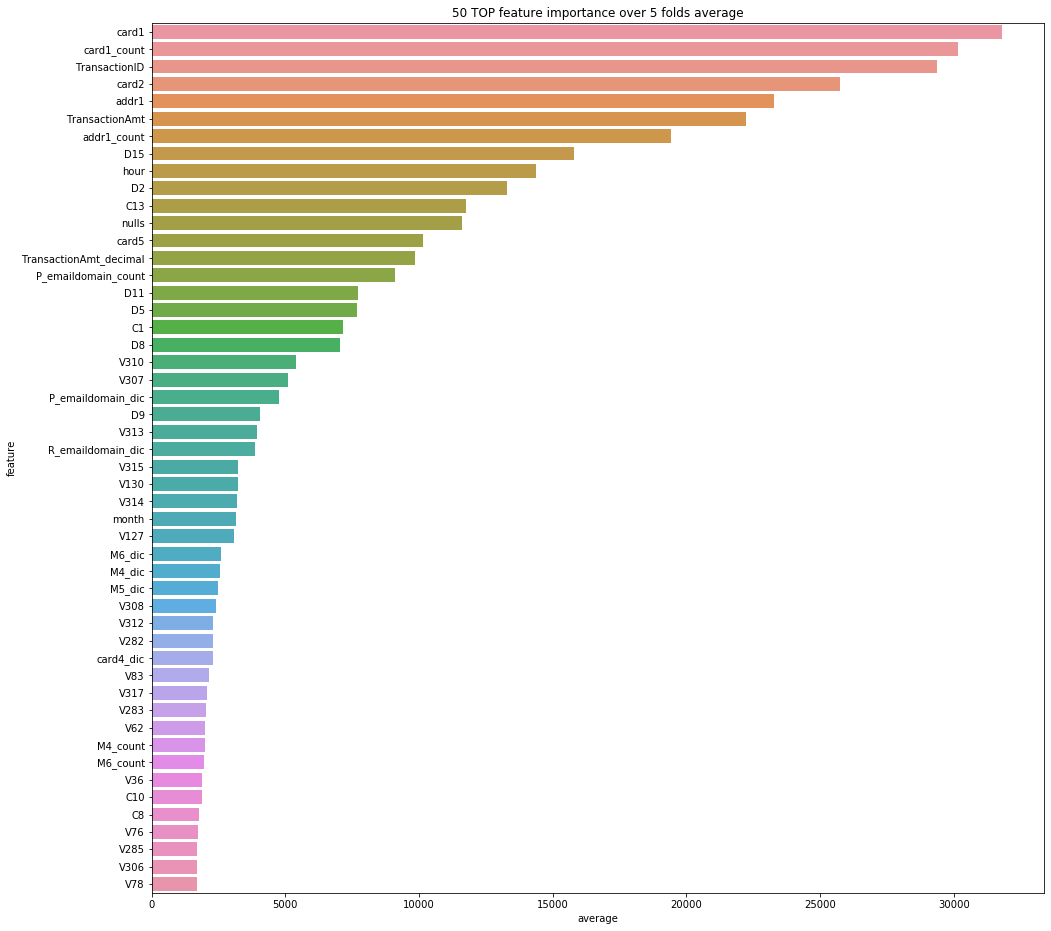

In [447]:
feature_importances['average'] = feature_importances[['fold_{}'.format(fold + 1) for fold in range(folds.n_splits)]].mean(axis=1)
feature_importances.to_csv('feature_importances.csv')

plt.figure(figsize=(16, 16))
sns.barplot(data=feature_importances.sort_values(by='average', ascending=False).head(50), x='average', y='feature');
plt.title('50 TOP feature importance over {} folds average'.format(folds.n_splits));



In [450]:
#time series split best iteration
best_iter = clf.best_iteration
clf.best_score

defaultdict(dict,
            {'training': {'auc': 0.9979679658007193},
             'valid_1': {'auc': 0.9335068243194845}})

In [ ]:
clf = lgb.LGBMClassifier(**params, num_boost_round=best_iter)
clf.fit(X, y)


In [36]:
#important to reset index
test_x=test_x.reset_index(drop=False)

#No cross validation prediction:
#test_x['isFraud']=clf.predict_proba(test_x.drop(columns=['TransactionID']))[:,1]

#for kfold
test_x['isFraud']=test_predictions['prediction']

#for time series split
#test_x['isFraud'] = clf.predict_proba(test_x.drop(columns=['TransactionID']))[:, 1]


In [37]:
output=test_x[['TransactionID','isFraud']]

In [38]:
#test.shape
output.to_csv("output_submission_v5_kfold10_encoding.csv",index=False)